#**Deep Impute** 

#Data: Single cell transcriptome of human pancreas

Implementation pipeline of Deep Impute model from scdeep package The pipline consists of the foloowing :
1. Loading the data and building a AnnData from the counts data and metadata
2. Preprocessing(quality filtering) and training the Deep Impute model
3. Comapring the quality of data before and after the application of model
4. Down stream Analysis - PCA, tSNE, UMAP, Clustering analysis
5. Additional visualizations

In [ ]:
!pip install scdeep

In [ ]:
!pip install -q scanpy

     |████████████████████████████████| 7.2MB 2.7MB/s 
     |████████████████████████████████| 122kB 43.3MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd 'drive/My Drive/BL uploads'

/content/drive/My Drive/BL uploads


In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
%matplotlib inline 
import scdeep

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
adata= sc.datasets.ebi_expression_atlas("E-GEOD-81547")

In [ ]:
z=(adata.X).toarray()
adata.X=z

In [ ]:
adata.shape

(2544, 27821)

In [ ]:
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=20000, subset=True)
adata.X #expression matrix

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 3.9318256, 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 4.477337 , 0.8670703, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [ ]:
from scdeep import deep_impute
from scdeep import scScope

In [ ]:
gene_matrix = pd.DataFrame(adata.X)
model = deep_impute.DeepImputeModel()
gene_dataset = scdeep.dataset.GeneExpressionDataset()

In [ ]:
gene_dataset.from_data(gene_matrix)
trainer = deep_impute.DeepImputeTrainer(model=model, gene_dataset=gene_dataset, batch_size=64)

Network 0: 1003 predictors, 512 targets
Network 1: 1059 predictors, 512 targets
Network 2: 1005 predictors, 512 targets
Network 3: 1025 predictors, 512 targets
Network 4: 1013 predictors, 512 targets
Network 5: 1025 predictors, 512 targets
Network 6: 995 predictors, 512 targets
Network 7: 1023 predictors, 512 targets
Network 8: 992 predictors, 512 targets
Network 9: 1004 predictors, 512 targets
Network 10: 1047 predictors, 512 targets
Network 11: 969 predictors, 512 targets
Network 12: 992 predictors, 512 targets
Network 13: 1039 predictors, 512 targets
Network 14: 1038 predictors, 512 targets
Network 15: 1048 predictors, 512 targets
Network 16: 959 predictors, 512 targets
Network 17: 1009 predictors, 512 targets
Network 18: 956 predictors, 512 targets


training:   0%|          | 0/100 [00:00<?, ?it/s]

module_list.0.dense_layer.weight
torch.Size([256, 1003])
module_list.0.dense_layer.bias
torch.Size([256])
module_list.0.output_layer.weight
torch.Size([512, 256])
module_list.0.output_layer.bias
torch.Size([512])
module_list.1.dense_layer.weight
torch.Size([256, 1059])
module_list.1.dense_layer.bias
torch.Size([256])
module_list.1.output_layer.weight
torch.Size([512, 256])
module_list.1.output_layer.bias
torch.Size([512])
module_list.2.dense_layer.weight
torch.Size([256, 1005])
module_list.2.dense_layer.bias
torch.Size([256])
module_list.2.output_layer.weight
torch.Size([512, 256])
module_list.2.output_layer.bias
torch.Size([512])
module_list.3.dense_layer.weight
torch.Size([256, 1025])
module_list.3.dense_layer.bias
torch.Size([256])
module_list.3.output_layer.weight
torch.Size([512, 256])
module_list.3.output_layer.bias
torch.Size([512])
module_list.4.dense_layer.weight
torch.Size([256, 1013])
module_list.4.dense_layer.bias
torch.Size([256])
module_list.4.output_layer.weight
torch.Si

training:   1%|          | 1/100 [00:04<08:06,  4.91s/it]


Validation Loss: 0.1491


Epoch: 2

Iteration: 0 Loss: 0.1891
Iteration: 1 Loss: 0.1684
Iteration: 2 Loss: 0.1552
Iteration: 3 Loss: 0.1634
Iteration: 4 Loss: 0.1385
Iteration: 5 Loss: 0.1585
Iteration: 6 Loss: 0.1569
Iteration: 7 Loss: 0.1492
Iteration: 8 Loss: 0.1466
Iteration: 9 Loss: 0.1363
Iteration: 10 Loss: 0.1434
Iteration: 11 Loss: 0.1414
Iteration: 12 Loss: 0.1415
Iteration: 13 Loss: 0.1364
Iteration: 14 Loss: 0.1377
Iteration: 15 Loss: 0.1380
Iteration: 16 Loss: 0.1269
Iteration: 17 Loss: 0.1283
Iteration: 18 Loss: 0.1280
Iteration: 19 Loss: 0.1383
Iteration: 20 Loss: 0.1267
Iteration: 21 Loss: 0.1259
Iteration: 22 Loss: 0.1278
Iteration: 23 Loss: 0.1251
Iteration: 24 Loss: 0.1238
Iteration: 25 Loss: 0.1185
Iteration: 26 Loss: 0.1215
Iteration: 27 Loss: 0.1150
Iteration: 28 Loss: 0.1178
Iteration: 29 Loss: 0.1237
Iteration: 30 Loss: 0.1205
Iteration: 31 Loss: 0.1119


training:   2%|▏         | 2/100 [00:09<07:50,  4.80s/it]


Validation Loss: 0.0871


Epoch: 3

Iteration: 0 Loss: 0.1052
Iteration: 1 Loss: 0.1179
Iteration: 2 Loss: 0.1091
Iteration: 3 Loss: 0.1106
Iteration: 4 Loss: 0.1148
Iteration: 5 Loss: 0.1155
Iteration: 6 Loss: 0.1121
Iteration: 7 Loss: 0.1051
Iteration: 8 Loss: 0.1046
Iteration: 9 Loss: 0.1107
Iteration: 10 Loss: 0.1058
Iteration: 11 Loss: 0.1046
Iteration: 12 Loss: 0.1079
Iteration: 13 Loss: 0.1024
Iteration: 14 Loss: 0.1036
Iteration: 15 Loss: 0.1031
Iteration: 16 Loss: 0.1081
Iteration: 17 Loss: 0.1081
Iteration: 18 Loss: 0.0956
Iteration: 19 Loss: 0.0982
Iteration: 20 Loss: 0.1034
Iteration: 21 Loss: 0.1001
Iteration: 22 Loss: 0.0978
Iteration: 23 Loss: 0.0987
Iteration: 24 Loss: 0.0917
Iteration: 25 Loss: 0.0926
Iteration: 26 Loss: 0.0968
Iteration: 27 Loss: 0.1002
Iteration: 28 Loss: 0.0917
Iteration: 29 Loss: 0.1005
Iteration: 30 Loss: 0.0984
Iteration: 31 Loss: 0.0977


training:   3%|▎         | 3/100 [00:13<07:35,  4.70s/it]


Validation Loss: 0.0749


Epoch: 4

Iteration: 0 Loss: 0.0968
Iteration: 1 Loss: 0.0956
Iteration: 2 Loss: 0.0956
Iteration: 3 Loss: 0.0973
Iteration: 4 Loss: 0.0911
Iteration: 5 Loss: 0.0930
Iteration: 6 Loss: 0.0914
Iteration: 7 Loss: 0.1012
Iteration: 8 Loss: 0.0929
Iteration: 9 Loss: 0.0908
Iteration: 10 Loss: 0.0885
Iteration: 11 Loss: 0.0926
Iteration: 12 Loss: 0.0912
Iteration: 13 Loss: 0.0951
Iteration: 14 Loss: 0.0870
Iteration: 15 Loss: 0.0933
Iteration: 16 Loss: 0.0978
Iteration: 17 Loss: 0.0953
Iteration: 18 Loss: 0.0960
Iteration: 19 Loss: 0.0841
Iteration: 20 Loss: 0.0926
Iteration: 21 Loss: 0.0925
Iteration: 22 Loss: 0.0892
Iteration: 23 Loss: 0.0893
Iteration: 24 Loss: 0.0972
Iteration: 25 Loss: 0.0858
Iteration: 26 Loss: 0.0902
Iteration: 27 Loss: 0.0924
Iteration: 28 Loss: 0.0881
Iteration: 29 Loss: 0.0832
Iteration: 30 Loss: 0.0859
Iteration: 31 Loss: 0.0847


training:   4%|▍         | 4/100 [00:18<07:24,  4.63s/it]


Validation Loss: 0.0705


Epoch: 5

Iteration: 0 Loss: 0.0855
Iteration: 1 Loss: 0.0911
Iteration: 2 Loss: 0.0880
Iteration: 3 Loss: 0.0863
Iteration: 4 Loss: 0.0923
Iteration: 5 Loss: 0.0814
Iteration: 6 Loss: 0.0974
Iteration: 7 Loss: 0.0861
Iteration: 8 Loss: 0.0858
Iteration: 9 Loss: 0.0910
Iteration: 10 Loss: 0.0863
Iteration: 11 Loss: 0.0785
Iteration: 12 Loss: 0.0847
Iteration: 13 Loss: 0.0798
Iteration: 14 Loss: 0.0905
Iteration: 15 Loss: 0.0831
Iteration: 16 Loss: 0.0851
Iteration: 17 Loss: 0.0911
Iteration: 18 Loss: 0.0812
Iteration: 19 Loss: 0.0893
Iteration: 20 Loss: 0.0863
Iteration: 21 Loss: 0.0784
Iteration: 22 Loss: 0.0853
Iteration: 23 Loss: 0.0839
Iteration: 24 Loss: 0.0804
Iteration: 25 Loss: 0.0759
Iteration: 26 Loss: 0.0803
Iteration: 27 Loss: 0.0835
Iteration: 28 Loss: 0.0836
Iteration: 29 Loss: 0.0827
Iteration: 30 Loss: 0.0793
Iteration: 31 Loss: 0.0819


training:   5%|▌         | 5/100 [00:22<07:15,  4.59s/it]


Validation Loss: 0.0674


Epoch: 6

Iteration: 0 Loss: 0.0784
Iteration: 1 Loss: 0.0802
Iteration: 2 Loss: 0.0845
Iteration: 3 Loss: 0.0816
Iteration: 4 Loss: 0.0865
Iteration: 5 Loss: 0.0846
Iteration: 6 Loss: 0.0853
Iteration: 7 Loss: 0.0815
Iteration: 8 Loss: 0.0771
Iteration: 9 Loss: 0.0791
Iteration: 10 Loss: 0.0799
Iteration: 11 Loss: 0.0799
Iteration: 12 Loss: 0.0843
Iteration: 13 Loss: 0.0879
Iteration: 14 Loss: 0.0823
Iteration: 15 Loss: 0.0750
Iteration: 16 Loss: 0.0779
Iteration: 17 Loss: 0.0790
Iteration: 18 Loss: 0.0769
Iteration: 19 Loss: 0.0830
Iteration: 20 Loss: 0.0826
Iteration: 21 Loss: 0.0832
Iteration: 22 Loss: 0.0801
Iteration: 23 Loss: 0.0766
Iteration: 24 Loss: 0.0785
Iteration: 25 Loss: 0.0728
Iteration: 26 Loss: 0.0830
Iteration: 27 Loss: 0.0786
Iteration: 28 Loss: 0.0803
Iteration: 29 Loss: 0.0755
Iteration: 30 Loss: 0.0766
Iteration: 31 Loss: 0.0785


training:   6%|▌         | 6/100 [00:27<07:08,  4.55s/it]


Validation Loss: 0.0656


Epoch: 7

Iteration: 0 Loss: 0.0765
Iteration: 1 Loss: 0.0799
Iteration: 2 Loss: 0.0741
Iteration: 3 Loss: 0.0765
Iteration: 4 Loss: 0.0780
Iteration: 5 Loss: 0.0762
Iteration: 6 Loss: 0.0783
Iteration: 7 Loss: 0.0746
Iteration: 8 Loss: 0.0737
Iteration: 9 Loss: 0.0791
Iteration: 10 Loss: 0.0784
Iteration: 11 Loss: 0.0807
Iteration: 12 Loss: 0.0777
Iteration: 13 Loss: 0.0785
Iteration: 14 Loss: 0.0774
Iteration: 15 Loss: 0.0732
Iteration: 16 Loss: 0.0764
Iteration: 17 Loss: 0.0832
Iteration: 18 Loss: 0.0810
Iteration: 19 Loss: 0.0775
Iteration: 20 Loss: 0.0752
Iteration: 21 Loss: 0.0754
Iteration: 22 Loss: 0.0792
Iteration: 23 Loss: 0.0713
Iteration: 24 Loss: 0.0831
Iteration: 25 Loss: 0.0804
Iteration: 26 Loss: 0.0733
Iteration: 27 Loss: 0.0769
Iteration: 28 Loss: 0.0730
Iteration: 29 Loss: 0.0785
Iteration: 30 Loss: 0.0772
Iteration: 31 Loss: 0.0749


training:   7%|▋         | 7/100 [00:31<07:01,  4.54s/it]


Validation Loss: 0.0646


Epoch: 8

Iteration: 0 Loss: 0.0715
Iteration: 1 Loss: 0.0744
Iteration: 2 Loss: 0.0697
Iteration: 3 Loss: 0.0777
Iteration: 4 Loss: 0.0806
Iteration: 5 Loss: 0.0752
Iteration: 6 Loss: 0.0735
Iteration: 7 Loss: 0.0797
Iteration: 8 Loss: 0.0756
Iteration: 9 Loss: 0.0781
Iteration: 10 Loss: 0.0707
Iteration: 11 Loss: 0.0787
Iteration: 12 Loss: 0.0805
Iteration: 13 Loss: 0.0724
Iteration: 14 Loss: 0.0732
Iteration: 15 Loss: 0.0741
Iteration: 16 Loss: 0.0728
Iteration: 17 Loss: 0.0718
Iteration: 18 Loss: 0.0751
Iteration: 19 Loss: 0.0726
Iteration: 20 Loss: 0.0725
Iteration: 21 Loss: 0.0754
Iteration: 22 Loss: 0.0740
Iteration: 23 Loss: 0.0711
Iteration: 24 Loss: 0.0776
Iteration: 25 Loss: 0.0718
Iteration: 26 Loss: 0.0776
Iteration: 27 Loss: 0.0773
Iteration: 28 Loss: 0.0770
Iteration: 29 Loss: 0.0726
Iteration: 30 Loss: 0.0723
Iteration: 31 Loss: 0.0731


training:   8%|▊         | 8/100 [00:36<06:55,  4.51s/it]


Validation Loss: 0.0637


Epoch: 9

Iteration: 0 Loss: 0.0770
Iteration: 1 Loss: 0.0711
Iteration: 2 Loss: 0.0684
Iteration: 3 Loss: 0.0687
Iteration: 4 Loss: 0.0695
Iteration: 5 Loss: 0.0766
Iteration: 6 Loss: 0.0728
Iteration: 7 Loss: 0.0731
Iteration: 8 Loss: 0.0754
Iteration: 9 Loss: 0.0733
Iteration: 10 Loss: 0.0741
Iteration: 11 Loss: 0.0749
Iteration: 12 Loss: 0.0726
Iteration: 13 Loss: 0.0721
Iteration: 14 Loss: 0.0690
Iteration: 15 Loss: 0.0721
Iteration: 16 Loss: 0.0718
Iteration: 17 Loss: 0.0762
Iteration: 18 Loss: 0.0749
Iteration: 19 Loss: 0.0740
Iteration: 20 Loss: 0.0714
Iteration: 21 Loss: 0.0764
Iteration: 22 Loss: 0.0708
Iteration: 23 Loss: 0.0716
Iteration: 24 Loss: 0.0716
Iteration: 25 Loss: 0.0778
Iteration: 26 Loss: 0.0689
Iteration: 27 Loss: 0.0749
Iteration: 28 Loss: 0.0712
Iteration: 29 Loss: 0.0720
Iteration: 30 Loss: 0.0680
Iteration: 31 Loss: 0.0741


training:   9%|▉         | 9/100 [00:40<06:51,  4.52s/it]


Validation Loss: 0.0628


Epoch: 10

Iteration: 0 Loss: 0.0712
Iteration: 1 Loss: 0.0690
Iteration: 2 Loss: 0.0731
Iteration: 3 Loss: 0.0784
Iteration: 4 Loss: 0.0691
Iteration: 5 Loss: 0.0680
Iteration: 6 Loss: 0.0706
Iteration: 7 Loss: 0.0702
Iteration: 8 Loss: 0.0755
Iteration: 9 Loss: 0.0744
Iteration: 10 Loss: 0.0685
Iteration: 11 Loss: 0.0706
Iteration: 12 Loss: 0.0703
Iteration: 13 Loss: 0.0725
Iteration: 14 Loss: 0.0691
Iteration: 15 Loss: 0.0716
Iteration: 16 Loss: 0.0703
Iteration: 17 Loss: 0.0737
Iteration: 18 Loss: 0.0716
Iteration: 19 Loss: 0.0712
Iteration: 20 Loss: 0.0713
Iteration: 21 Loss: 0.0653
Iteration: 22 Loss: 0.0709
Iteration: 23 Loss: 0.0659
Iteration: 24 Loss: 0.0680
Iteration: 25 Loss: 0.0755
Iteration: 26 Loss: 0.0695
Iteration: 27 Loss: 0.0705
Iteration: 28 Loss: 0.0675
Iteration: 29 Loss: 0.0746
Iteration: 30 Loss: 0.0723
Iteration: 31 Loss: 0.0721


training:  10%|█         | 10/100 [00:45<06:44,  4.50s/it]


Validation Loss: 0.0623


Epoch: 11

Iteration: 0 Loss: 0.0692
Iteration: 1 Loss: 0.0675
Iteration: 2 Loss: 0.0695
Iteration: 3 Loss: 0.0717
Iteration: 4 Loss: 0.0666
Iteration: 5 Loss: 0.0679
Iteration: 6 Loss: 0.0711
Iteration: 7 Loss: 0.0712
Iteration: 8 Loss: 0.0744
Iteration: 9 Loss: 0.0638
Iteration: 10 Loss: 0.0719
Iteration: 11 Loss: 0.0698
Iteration: 12 Loss: 0.0691
Iteration: 13 Loss: 0.0687
Iteration: 14 Loss: 0.0716
Iteration: 15 Loss: 0.0688
Iteration: 16 Loss: 0.0737
Iteration: 17 Loss: 0.0719
Iteration: 18 Loss: 0.0728
Iteration: 19 Loss: 0.0675
Iteration: 20 Loss: 0.0734
Iteration: 21 Loss: 0.0679
Iteration: 22 Loss: 0.0670
Iteration: 23 Loss: 0.0673
Iteration: 24 Loss: 0.0684
Iteration: 25 Loss: 0.0750
Iteration: 26 Loss: 0.0712
Iteration: 27 Loss: 0.0673
Iteration: 28 Loss: 0.0670
Iteration: 29 Loss: 0.0700
Iteration: 30 Loss: 0.0659
Iteration: 31 Loss: 0.0678


training:  11%|█         | 11/100 [00:49<06:40,  4.50s/it]


Validation Loss: 0.0621


Epoch: 12

Iteration: 0 Loss: 0.0658
Iteration: 1 Loss: 0.0667
Iteration: 2 Loss: 0.0673
Iteration: 3 Loss: 0.0636
Iteration: 4 Loss: 0.0685
Iteration: 5 Loss: 0.0708
Iteration: 6 Loss: 0.0649
Iteration: 7 Loss: 0.0679
Iteration: 8 Loss: 0.0661
Iteration: 9 Loss: 0.0708
Iteration: 10 Loss: 0.0642
Iteration: 11 Loss: 0.0680
Iteration: 12 Loss: 0.0687
Iteration: 13 Loss: 0.0732
Iteration: 14 Loss: 0.0715
Iteration: 15 Loss: 0.0691
Iteration: 16 Loss: 0.0733
Iteration: 17 Loss: 0.0715
Iteration: 18 Loss: 0.0712
Iteration: 19 Loss: 0.0654
Iteration: 20 Loss: 0.0653
Iteration: 21 Loss: 0.0695
Iteration: 22 Loss: 0.0683
Iteration: 23 Loss: 0.0687
Iteration: 24 Loss: 0.0646
Iteration: 25 Loss: 0.0662
Iteration: 26 Loss: 0.0686
Iteration: 27 Loss: 0.0672
Iteration: 28 Loss: 0.0702
Iteration: 29 Loss: 0.0708
Iteration: 30 Loss: 0.0691
Iteration: 31 Loss: 0.0680


training:  12%|█▏        | 12/100 [00:54<06:36,  4.50s/it]


Validation Loss: 0.0615


Epoch: 13

Iteration: 0 Loss: 0.0727
Iteration: 1 Loss: 0.0700
Iteration: 2 Loss: 0.0665
Iteration: 3 Loss: 0.0688
Iteration: 4 Loss: 0.0682
Iteration: 5 Loss: 0.0647
Iteration: 6 Loss: 0.0675
Iteration: 7 Loss: 0.0663
Iteration: 8 Loss: 0.0660
Iteration: 9 Loss: 0.0711
Iteration: 10 Loss: 0.0659
Iteration: 11 Loss: 0.0701
Iteration: 12 Loss: 0.0639
Iteration: 13 Loss: 0.0701
Iteration: 14 Loss: 0.0634
Iteration: 15 Loss: 0.0706
Iteration: 16 Loss: 0.0675
Iteration: 17 Loss: 0.0688
Iteration: 18 Loss: 0.0733
Iteration: 19 Loss: 0.0637
Iteration: 20 Loss: 0.0684
Iteration: 21 Loss: 0.0682
Iteration: 22 Loss: 0.0650
Iteration: 23 Loss: 0.0635
Iteration: 24 Loss: 0.0663
Iteration: 25 Loss: 0.0636
Iteration: 26 Loss: 0.0664
Iteration: 27 Loss: 0.0661
Iteration: 28 Loss: 0.0640
Iteration: 29 Loss: 0.0640
Iteration: 30 Loss: 0.0668
Iteration: 31 Loss: 0.0696


training:  13%|█▎        | 13/100 [00:58<06:31,  4.50s/it]


Validation Loss: 0.0613


Epoch: 14

Iteration: 0 Loss: 0.0645
Iteration: 1 Loss: 0.0695
Iteration: 2 Loss: 0.0637
Iteration: 3 Loss: 0.0689
Iteration: 4 Loss: 0.0672
Iteration: 5 Loss: 0.0642
Iteration: 6 Loss: 0.0684
Iteration: 7 Loss: 0.0665
Iteration: 8 Loss: 0.0645
Iteration: 9 Loss: 0.0667
Iteration: 10 Loss: 0.0650
Iteration: 11 Loss: 0.0650
Iteration: 12 Loss: 0.0606
Iteration: 13 Loss: 0.0632
Iteration: 14 Loss: 0.0665
Iteration: 15 Loss: 0.0648
Iteration: 16 Loss: 0.0699
Iteration: 17 Loss: 0.0693
Iteration: 18 Loss: 0.0676
Iteration: 19 Loss: 0.0671
Iteration: 20 Loss: 0.0644
Iteration: 21 Loss: 0.0632
Iteration: 22 Loss: 0.0690
Iteration: 23 Loss: 0.0668
Iteration: 24 Loss: 0.0663
Iteration: 25 Loss: 0.0732
Iteration: 26 Loss: 0.0683
Iteration: 27 Loss: 0.0654
Iteration: 28 Loss: 0.0641
Iteration: 29 Loss: 0.0632
Iteration: 30 Loss: 0.0684
Iteration: 31 Loss: 0.0647


training:  14%|█▍        | 14/100 [01:03<06:26,  4.50s/it]


Validation Loss: 0.0607


Epoch: 15

Iteration: 0 Loss: 0.0649
Iteration: 1 Loss: 0.0651
Iteration: 2 Loss: 0.0622
Iteration: 3 Loss: 0.0603
Iteration: 4 Loss: 0.0639
Iteration: 5 Loss: 0.0706
Iteration: 6 Loss: 0.0664
Iteration: 7 Loss: 0.0658
Iteration: 8 Loss: 0.0681
Iteration: 9 Loss: 0.0651
Iteration: 10 Loss: 0.0619
Iteration: 11 Loss: 0.0673
Iteration: 12 Loss: 0.0646
Iteration: 13 Loss: 0.0681
Iteration: 14 Loss: 0.0696
Iteration: 15 Loss: 0.0698
Iteration: 16 Loss: 0.0617
Iteration: 17 Loss: 0.0679
Iteration: 18 Loss: 0.0649
Iteration: 19 Loss: 0.0638
Iteration: 20 Loss: 0.0713
Iteration: 21 Loss: 0.0640
Iteration: 22 Loss: 0.0640
Iteration: 23 Loss: 0.0690
Iteration: 24 Loss: 0.0633
Iteration: 25 Loss: 0.0657
Iteration: 26 Loss: 0.0651
Iteration: 27 Loss: 0.0624
Iteration: 28 Loss: 0.0655
Iteration: 29 Loss: 0.0644
Iteration: 30 Loss: 0.0626
Iteration: 31 Loss: 0.0616


training:  15%|█▌        | 15/100 [01:07<06:21,  4.48s/it]


Validation Loss: 0.0607


Epoch: 16

Iteration: 0 Loss: 0.0639
Iteration: 1 Loss: 0.0663
Iteration: 2 Loss: 0.0681
Iteration: 3 Loss: 0.0654
Iteration: 4 Loss: 0.0640
Iteration: 5 Loss: 0.0660
Iteration: 6 Loss: 0.0601
Iteration: 7 Loss: 0.0632
Iteration: 8 Loss: 0.0686
Iteration: 9 Loss: 0.0657
Iteration: 10 Loss: 0.0639
Iteration: 11 Loss: 0.0645
Iteration: 12 Loss: 0.0665
Iteration: 13 Loss: 0.0643
Iteration: 14 Loss: 0.0604
Iteration: 15 Loss: 0.0677
Iteration: 16 Loss: 0.0678
Iteration: 17 Loss: 0.0689
Iteration: 18 Loss: 0.0612
Iteration: 19 Loss: 0.0620
Iteration: 20 Loss: 0.0674
Iteration: 21 Loss: 0.0653
Iteration: 22 Loss: 0.0607
Iteration: 23 Loss: 0.0677
Iteration: 24 Loss: 0.0631
Iteration: 25 Loss: 0.0644
Iteration: 26 Loss: 0.0601
Iteration: 27 Loss: 0.0603
Iteration: 28 Loss: 0.0660
Iteration: 29 Loss: 0.0634
Iteration: 30 Loss: 0.0617
Iteration: 31 Loss: 0.0656


training:  16%|█▌        | 16/100 [01:12<06:16,  4.49s/it]


Validation Loss: 0.0602


Epoch: 17

Iteration: 0 Loss: 0.0602
Iteration: 1 Loss: 0.0625
Iteration: 2 Loss: 0.0621
Iteration: 3 Loss: 0.0628
Iteration: 4 Loss: 0.0646
Iteration: 5 Loss: 0.0598
Iteration: 6 Loss: 0.0604
Iteration: 7 Loss: 0.0658
Iteration: 8 Loss: 0.0616
Iteration: 9 Loss: 0.0601
Iteration: 10 Loss: 0.0660
Iteration: 11 Loss: 0.0633
Iteration: 12 Loss: 0.0665
Iteration: 13 Loss: 0.0667
Iteration: 14 Loss: 0.0679
Iteration: 15 Loss: 0.0592
Iteration: 16 Loss: 0.0613
Iteration: 17 Loss: 0.0640
Iteration: 18 Loss: 0.0595
Iteration: 19 Loss: 0.0695
Iteration: 20 Loss: 0.0635
Iteration: 21 Loss: 0.0660
Iteration: 22 Loss: 0.0642
Iteration: 23 Loss: 0.0644
Iteration: 24 Loss: 0.0637
Iteration: 25 Loss: 0.0637
Iteration: 26 Loss: 0.0645
Iteration: 27 Loss: 0.0658
Iteration: 28 Loss: 0.0644
Iteration: 29 Loss: 0.0674
Iteration: 30 Loss: 0.0652
Iteration: 31 Loss: 0.0653


training:  17%|█▋        | 17/100 [01:16<06:12,  4.48s/it]


Validation Loss: 0.0599


Epoch: 18

Iteration: 0 Loss: 0.0614
Iteration: 1 Loss: 0.0599
Iteration: 2 Loss: 0.0642
Iteration: 3 Loss: 0.0668
Iteration: 4 Loss: 0.0630
Iteration: 5 Loss: 0.0664
Iteration: 6 Loss: 0.0606
Iteration: 7 Loss: 0.0663
Iteration: 8 Loss: 0.0653
Iteration: 9 Loss: 0.0595
Iteration: 10 Loss: 0.0622
Iteration: 11 Loss: 0.0617
Iteration: 12 Loss: 0.0635
Iteration: 13 Loss: 0.0623
Iteration: 14 Loss: 0.0607
Iteration: 15 Loss: 0.0589
Iteration: 16 Loss: 0.0630
Iteration: 17 Loss: 0.0603
Iteration: 18 Loss: 0.0642
Iteration: 19 Loss: 0.0642
Iteration: 20 Loss: 0.0621
Iteration: 21 Loss: 0.0628
Iteration: 22 Loss: 0.0637
Iteration: 23 Loss: 0.0664
Iteration: 24 Loss: 0.0631
Iteration: 25 Loss: 0.0641
Iteration: 26 Loss: 0.0611
Iteration: 27 Loss: 0.0643
Iteration: 28 Loss: 0.0678
Iteration: 29 Loss: 0.0634
Iteration: 30 Loss: 0.0634
Iteration: 31 Loss: 0.0627


training:  18%|█▊        | 18/100 [01:21<06:07,  4.48s/it]


Validation Loss: 0.0598


Epoch: 19

Iteration: 0 Loss: 0.0658
Iteration: 1 Loss: 0.0700
Iteration: 2 Loss: 0.0625
Iteration: 3 Loss: 0.0580
Iteration: 4 Loss: 0.0637
Iteration: 5 Loss: 0.0641
Iteration: 6 Loss: 0.0618
Iteration: 7 Loss: 0.0658
Iteration: 8 Loss: 0.0597
Iteration: 9 Loss: 0.0587
Iteration: 10 Loss: 0.0631
Iteration: 11 Loss: 0.0630
Iteration: 12 Loss: 0.0644
Iteration: 13 Loss: 0.0598
Iteration: 14 Loss: 0.0615
Iteration: 15 Loss: 0.0635
Iteration: 16 Loss: 0.0650
Iteration: 17 Loss: 0.0625
Iteration: 18 Loss: 0.0623
Iteration: 19 Loss: 0.0599
Iteration: 20 Loss: 0.0614
Iteration: 21 Loss: 0.0586
Iteration: 22 Loss: 0.0622
Iteration: 23 Loss: 0.0618
Iteration: 24 Loss: 0.0614
Iteration: 25 Loss: 0.0642
Iteration: 26 Loss: 0.0640
Iteration: 27 Loss: 0.0617
Iteration: 28 Loss: 0.0635
Iteration: 29 Loss: 0.0622
Iteration: 30 Loss: 0.0542
Iteration: 31 Loss: 0.0686


training:  19%|█▉        | 19/100 [01:25<06:03,  4.49s/it]


Validation Loss: 0.0596


Epoch: 20

Iteration: 0 Loss: 0.0644
Iteration: 1 Loss: 0.0633
Iteration: 2 Loss: 0.0585
Iteration: 3 Loss: 0.0589
Iteration: 4 Loss: 0.0600
Iteration: 5 Loss: 0.0608
Iteration: 6 Loss: 0.0584
Iteration: 7 Loss: 0.0654
Iteration: 8 Loss: 0.0613
Iteration: 9 Loss: 0.0639
Iteration: 10 Loss: 0.0631
Iteration: 11 Loss: 0.0597
Iteration: 12 Loss: 0.0634
Iteration: 13 Loss: 0.0574
Iteration: 14 Loss: 0.0591
Iteration: 15 Loss: 0.0633
Iteration: 16 Loss: 0.0624
Iteration: 17 Loss: 0.0632
Iteration: 18 Loss: 0.0589
Iteration: 19 Loss: 0.0650
Iteration: 20 Loss: 0.0635
Iteration: 21 Loss: 0.0628
Iteration: 22 Loss: 0.0607
Iteration: 23 Loss: 0.0592
Iteration: 24 Loss: 0.0663
Iteration: 25 Loss: 0.0585
Iteration: 26 Loss: 0.0637
Iteration: 27 Loss: 0.0612
Iteration: 28 Loss: 0.0642
Iteration: 29 Loss: 0.0571
Iteration: 30 Loss: 0.0659
Iteration: 31 Loss: 0.0643


training:  20%|██        | 20/100 [01:30<05:58,  4.48s/it]


Validation Loss: 0.0593


Epoch: 21

Iteration: 0 Loss: 0.0680
Iteration: 1 Loss: 0.0644
Iteration: 2 Loss: 0.0648
Iteration: 3 Loss: 0.0597
Iteration: 4 Loss: 0.0650
Iteration: 5 Loss: 0.0611
Iteration: 6 Loss: 0.0568
Iteration: 7 Loss: 0.0621
Iteration: 8 Loss: 0.0599
Iteration: 9 Loss: 0.0640
Iteration: 10 Loss: 0.0598
Iteration: 11 Loss: 0.0627
Iteration: 12 Loss: 0.0633
Iteration: 13 Loss: 0.0594
Iteration: 14 Loss: 0.0631
Iteration: 15 Loss: 0.0611
Iteration: 16 Loss: 0.0624
Iteration: 17 Loss: 0.0575
Iteration: 18 Loss: 0.0639
Iteration: 19 Loss: 0.0635
Iteration: 20 Loss: 0.0626
Iteration: 21 Loss: 0.0576
Iteration: 22 Loss: 0.0561
Iteration: 23 Loss: 0.0591
Iteration: 24 Loss: 0.0568
Iteration: 25 Loss: 0.0598
Iteration: 26 Loss: 0.0623
Iteration: 27 Loss: 0.0595
Iteration: 28 Loss: 0.0690
Iteration: 29 Loss: 0.0584
Iteration: 30 Loss: 0.0586
Iteration: 31 Loss: 0.0571


training:  21%|██        | 21/100 [01:34<05:54,  4.48s/it]


Validation Loss: 0.0594


Epoch: 22

Iteration: 0 Loss: 0.0605
Iteration: 1 Loss: 0.0584
Iteration: 2 Loss: 0.0643
Iteration: 3 Loss: 0.0574
Iteration: 4 Loss: 0.0605
Iteration: 5 Loss: 0.0582
Iteration: 6 Loss: 0.0613
Iteration: 7 Loss: 0.0620
Iteration: 8 Loss: 0.0599
Iteration: 9 Loss: 0.0596
Iteration: 10 Loss: 0.0612
Iteration: 11 Loss: 0.0615
Iteration: 12 Loss: 0.0627
Iteration: 13 Loss: 0.0621
Iteration: 14 Loss: 0.0608
Iteration: 15 Loss: 0.0581
Iteration: 16 Loss: 0.0625
Iteration: 17 Loss: 0.0597
Iteration: 18 Loss: 0.0641
Iteration: 19 Loss: 0.0598
Iteration: 20 Loss: 0.0606
Iteration: 21 Loss: 0.0596
Iteration: 22 Loss: 0.0615
Iteration: 23 Loss: 0.0638
Iteration: 24 Loss: 0.0573
Iteration: 25 Loss: 0.0635
Iteration: 26 Loss: 0.0626
Iteration: 27 Loss: 0.0590
Iteration: 28 Loss: 0.0576
Iteration: 29 Loss: 0.0618
Iteration: 30 Loss: 0.0601
Iteration: 31 Loss: 0.0646


training:  22%|██▏       | 22/100 [01:39<05:49,  4.48s/it]


Validation Loss: 0.0592


Epoch: 23

Iteration: 0 Loss: 0.0615
Iteration: 1 Loss: 0.0625
Iteration: 2 Loss: 0.0587
Iteration: 3 Loss: 0.0598
Iteration: 4 Loss: 0.0572
Iteration: 5 Loss: 0.0580
Iteration: 6 Loss: 0.0564
Iteration: 7 Loss: 0.0564
Iteration: 8 Loss: 0.0630
Iteration: 9 Loss: 0.0612
Iteration: 10 Loss: 0.0606
Iteration: 11 Loss: 0.0612
Iteration: 12 Loss: 0.0612
Iteration: 13 Loss: 0.0600
Iteration: 14 Loss: 0.0566
Iteration: 15 Loss: 0.0621
Iteration: 16 Loss: 0.0598
Iteration: 17 Loss: 0.0589
Iteration: 18 Loss: 0.0622
Iteration: 19 Loss: 0.0645
Iteration: 20 Loss: 0.0635
Iteration: 21 Loss: 0.0587
Iteration: 22 Loss: 0.0624
Iteration: 23 Loss: 0.0599
Iteration: 24 Loss: 0.0575
Iteration: 25 Loss: 0.0611
Iteration: 26 Loss: 0.0596
Iteration: 27 Loss: 0.0609
Iteration: 28 Loss: 0.0625
Iteration: 29 Loss: 0.0640
Iteration: 30 Loss: 0.0570
Iteration: 31 Loss: 0.0607


training:  23%|██▎       | 23/100 [01:43<05:43,  4.46s/it]


Validation Loss: 0.0590


Epoch: 24

Iteration: 0 Loss: 0.0587
Iteration: 1 Loss: 0.0624
Iteration: 2 Loss: 0.0607
Iteration: 3 Loss: 0.0596
Iteration: 4 Loss: 0.0597
Iteration: 5 Loss: 0.0576
Iteration: 6 Loss: 0.0623
Iteration: 7 Loss: 0.0586
Iteration: 8 Loss: 0.0617
Iteration: 9 Loss: 0.0622
Iteration: 10 Loss: 0.0600
Iteration: 11 Loss: 0.0647
Iteration: 12 Loss: 0.0584
Iteration: 13 Loss: 0.0616
Iteration: 14 Loss: 0.0593
Iteration: 15 Loss: 0.0620
Iteration: 16 Loss: 0.0575
Iteration: 17 Loss: 0.0594
Iteration: 18 Loss: 0.0557
Iteration: 19 Loss: 0.0610
Iteration: 20 Loss: 0.0594
Iteration: 21 Loss: 0.0606
Iteration: 22 Loss: 0.0579
Iteration: 23 Loss: 0.0623
Iteration: 24 Loss: 0.0577
Iteration: 25 Loss: 0.0599
Iteration: 26 Loss: 0.0581
Iteration: 27 Loss: 0.0559
Iteration: 28 Loss: 0.0598
Iteration: 29 Loss: 0.0565
Iteration: 30 Loss: 0.0589
Iteration: 31 Loss: 0.0626


training:  24%|██▍       | 24/100 [01:47<05:38,  4.46s/it]


Validation Loss: 0.0588


Epoch: 25

Iteration: 0 Loss: 0.0586
Iteration: 1 Loss: 0.0598
Iteration: 2 Loss: 0.0596
Iteration: 3 Loss: 0.0595
Iteration: 4 Loss: 0.0612
Iteration: 5 Loss: 0.0592
Iteration: 6 Loss: 0.0550
Iteration: 7 Loss: 0.0646
Iteration: 8 Loss: 0.0587
Iteration: 9 Loss: 0.0571
Iteration: 10 Loss: 0.0592
Iteration: 11 Loss: 0.0628
Iteration: 12 Loss: 0.0614
Iteration: 13 Loss: 0.0574
Iteration: 14 Loss: 0.0572
Iteration: 15 Loss: 0.0572
Iteration: 16 Loss: 0.0558
Iteration: 17 Loss: 0.0587
Iteration: 18 Loss: 0.0627
Iteration: 19 Loss: 0.0597
Iteration: 20 Loss: 0.0593
Iteration: 21 Loss: 0.0551
Iteration: 22 Loss: 0.0593
Iteration: 23 Loss: 0.0554
Iteration: 24 Loss: 0.0590
Iteration: 25 Loss: 0.0622
Iteration: 26 Loss: 0.0549
Iteration: 27 Loss: 0.0598
Iteration: 28 Loss: 0.0622
Iteration: 29 Loss: 0.0617
Iteration: 30 Loss: 0.0606
Iteration: 31 Loss: 0.0631


training:  25%|██▌       | 25/100 [01:52<05:34,  4.46s/it]


Validation Loss: 0.0588


Epoch: 26

Iteration: 0 Loss: 0.0609
Iteration: 1 Loss: 0.0602
Iteration: 2 Loss: 0.0618
Iteration: 3 Loss: 0.0584
Iteration: 4 Loss: 0.0593
Iteration: 5 Loss: 0.0539
Iteration: 6 Loss: 0.0562
Iteration: 7 Loss: 0.0604
Iteration: 8 Loss: 0.0581
Iteration: 9 Loss: 0.0586
Iteration: 10 Loss: 0.0562
Iteration: 11 Loss: 0.0559
Iteration: 12 Loss: 0.0575
Iteration: 13 Loss: 0.0619
Iteration: 14 Loss: 0.0624
Iteration: 15 Loss: 0.0563
Iteration: 16 Loss: 0.0570
Iteration: 17 Loss: 0.0583
Iteration: 18 Loss: 0.0581
Iteration: 19 Loss: 0.0591
Iteration: 20 Loss: 0.0599
Iteration: 21 Loss: 0.0601
Iteration: 22 Loss: 0.0608
Iteration: 23 Loss: 0.0577
Iteration: 24 Loss: 0.0573
Iteration: 25 Loss: 0.0566
Iteration: 26 Loss: 0.0605
Iteration: 27 Loss: 0.0573
Iteration: 28 Loss: 0.0618
Iteration: 29 Loss: 0.0582
Iteration: 30 Loss: 0.0600
Iteration: 31 Loss: 0.0641


training:  26%|██▌       | 26/100 [01:56<05:31,  4.48s/it]


Validation Loss: 0.0585


Epoch: 27

Iteration: 0 Loss: 0.0576
Iteration: 1 Loss: 0.0549
Iteration: 2 Loss: 0.0565
Iteration: 3 Loss: 0.0593
Iteration: 4 Loss: 0.0593
Iteration: 5 Loss: 0.0580
Iteration: 6 Loss: 0.0593
Iteration: 7 Loss: 0.0598
Iteration: 8 Loss: 0.0586
Iteration: 9 Loss: 0.0566
Iteration: 10 Loss: 0.0546
Iteration: 11 Loss: 0.0581
Iteration: 12 Loss: 0.0590
Iteration: 13 Loss: 0.0579
Iteration: 14 Loss: 0.0617
Iteration: 15 Loss: 0.0586
Iteration: 16 Loss: 0.0578
Iteration: 17 Loss: 0.0558
Iteration: 18 Loss: 0.0572
Iteration: 19 Loss: 0.0570
Iteration: 20 Loss: 0.0593
Iteration: 21 Loss: 0.0595
Iteration: 22 Loss: 0.0598
Iteration: 23 Loss: 0.0594
Iteration: 24 Loss: 0.0579
Iteration: 25 Loss: 0.0610
Iteration: 26 Loss: 0.0592
Iteration: 27 Loss: 0.0589
Iteration: 28 Loss: 0.0631
Iteration: 29 Loss: 0.0565
Iteration: 30 Loss: 0.0631
Iteration: 31 Loss: 0.0541


training:  27%|██▋       | 27/100 [02:01<05:26,  4.47s/it]


Validation Loss: 0.0584


Epoch: 28

Iteration: 0 Loss: 0.0564
Iteration: 1 Loss: 0.0648
Iteration: 2 Loss: 0.0576
Iteration: 3 Loss: 0.0572
Iteration: 4 Loss: 0.0583
Iteration: 5 Loss: 0.0622
Iteration: 6 Loss: 0.0585
Iteration: 7 Loss: 0.0577
Iteration: 8 Loss: 0.0595
Iteration: 9 Loss: 0.0561
Iteration: 10 Loss: 0.0573
Iteration: 11 Loss: 0.0611
Iteration: 12 Loss: 0.0607
Iteration: 13 Loss: 0.0537
Iteration: 14 Loss: 0.0569
Iteration: 15 Loss: 0.0609
Iteration: 16 Loss: 0.0550
Iteration: 17 Loss: 0.0578
Iteration: 18 Loss: 0.0583
Iteration: 19 Loss: 0.0634
Iteration: 20 Loss: 0.0551
Iteration: 21 Loss: 0.0598
Iteration: 22 Loss: 0.0584
Iteration: 23 Loss: 0.0602
Iteration: 24 Loss: 0.0597
Iteration: 25 Loss: 0.0562
Iteration: 26 Loss: 0.0577
Iteration: 27 Loss: 0.0554
Iteration: 28 Loss: 0.0526
Iteration: 29 Loss: 0.0599
Iteration: 30 Loss: 0.0526
Iteration: 31 Loss: 0.0572


training:  28%|██▊       | 28/100 [02:05<05:22,  4.47s/it]


Validation Loss: 0.0584


Epoch: 29

Iteration: 0 Loss: 0.0553
Iteration: 1 Loss: 0.0559
Iteration: 2 Loss: 0.0564
Iteration: 3 Loss: 0.0563
Iteration: 4 Loss: 0.0587
Iteration: 5 Loss: 0.0547
Iteration: 6 Loss: 0.0600
Iteration: 7 Loss: 0.0587
Iteration: 8 Loss: 0.0598
Iteration: 9 Loss: 0.0594
Iteration: 10 Loss: 0.0614
Iteration: 11 Loss: 0.0559
Iteration: 12 Loss: 0.0593
Iteration: 13 Loss: 0.0552
Iteration: 14 Loss: 0.0586
Iteration: 15 Loss: 0.0651
Iteration: 16 Loss: 0.0611
Iteration: 17 Loss: 0.0583
Iteration: 18 Loss: 0.0547
Iteration: 19 Loss: 0.0614
Iteration: 20 Loss: 0.0542
Iteration: 21 Loss: 0.0596
Iteration: 22 Loss: 0.0556
Iteration: 23 Loss: 0.0529
Iteration: 24 Loss: 0.0554
Iteration: 25 Loss: 0.0547
Iteration: 26 Loss: 0.0592
Iteration: 27 Loss: 0.0570
Iteration: 28 Loss: 0.0587
Iteration: 29 Loss: 0.0538
Iteration: 30 Loss: 0.0599
Iteration: 31 Loss: 0.0598


training:  29%|██▉       | 29/100 [02:10<05:16,  4.46s/it]


Validation Loss: 0.0582


Epoch: 30

Iteration: 0 Loss: 0.0574
Iteration: 1 Loss: 0.0568
Iteration: 2 Loss: 0.0618
Iteration: 3 Loss: 0.0558
Iteration: 4 Loss: 0.0606
Iteration: 5 Loss: 0.0532
Iteration: 6 Loss: 0.0529
Iteration: 7 Loss: 0.0514
Iteration: 8 Loss: 0.0556
Iteration: 9 Loss: 0.0583
Iteration: 10 Loss: 0.0563
Iteration: 11 Loss: 0.0551
Iteration: 12 Loss: 0.0570
Iteration: 13 Loss: 0.0592
Iteration: 14 Loss: 0.0588
Iteration: 15 Loss: 0.0540
Iteration: 16 Loss: 0.0574
Iteration: 17 Loss: 0.0590
Iteration: 18 Loss: 0.0566
Iteration: 19 Loss: 0.0590
Iteration: 20 Loss: 0.0607
Iteration: 21 Loss: 0.0575
Iteration: 22 Loss: 0.0598
Iteration: 23 Loss: 0.0564
Iteration: 24 Loss: 0.0578
Iteration: 25 Loss: 0.0564
Iteration: 26 Loss: 0.0571
Iteration: 27 Loss: 0.0590
Iteration: 28 Loss: 0.0576
Iteration: 29 Loss: 0.0615
Iteration: 30 Loss: 0.0569
Iteration: 31 Loss: 0.0565


training:  30%|███       | 30/100 [02:14<05:12,  4.46s/it]


Validation Loss: 0.0583


Epoch: 31

Iteration: 0 Loss: 0.0574
Iteration: 1 Loss: 0.0544
Iteration: 2 Loss: 0.0558
Iteration: 3 Loss: 0.0575
Iteration: 4 Loss: 0.0605
Iteration: 5 Loss: 0.0572
Iteration: 6 Loss: 0.0562
Iteration: 7 Loss: 0.0577
Iteration: 8 Loss: 0.0604
Iteration: 9 Loss: 0.0607
Iteration: 10 Loss: 0.0576
Iteration: 11 Loss: 0.0534
Iteration: 12 Loss: 0.0546
Iteration: 13 Loss: 0.0579
Iteration: 14 Loss: 0.0592
Iteration: 15 Loss: 0.0581
Iteration: 16 Loss: 0.0581
Iteration: 17 Loss: 0.0567
Iteration: 18 Loss: 0.0553
Iteration: 19 Loss: 0.0586
Iteration: 20 Loss: 0.0582
Iteration: 21 Loss: 0.0536
Iteration: 22 Loss: 0.0585
Iteration: 23 Loss: 0.0586
Iteration: 24 Loss: 0.0548
Iteration: 25 Loss: 0.0575
Iteration: 26 Loss: 0.0540
Iteration: 27 Loss: 0.0568
Iteration: 28 Loss: 0.0582
Iteration: 29 Loss: 0.0589
Iteration: 30 Loss: 0.0517
Iteration: 31 Loss: 0.0548


training:  31%|███       | 31/100 [02:19<05:08,  4.47s/it]


Validation Loss: 0.0581


Epoch: 32

Iteration: 0 Loss: 0.0566
Iteration: 1 Loss: 0.0607
Iteration: 2 Loss: 0.0587
Iteration: 3 Loss: 0.0556
Iteration: 4 Loss: 0.0546
Iteration: 5 Loss: 0.0579
Iteration: 6 Loss: 0.0555
Iteration: 7 Loss: 0.0572
Iteration: 8 Loss: 0.0546
Iteration: 9 Loss: 0.0598
Iteration: 10 Loss: 0.0550
Iteration: 11 Loss: 0.0576
Iteration: 12 Loss: 0.0586
Iteration: 13 Loss: 0.0608
Iteration: 14 Loss: 0.0574
Iteration: 15 Loss: 0.0586
Iteration: 16 Loss: 0.0592
Iteration: 17 Loss: 0.0585
Iteration: 18 Loss: 0.0569
Iteration: 19 Loss: 0.0555
Iteration: 20 Loss: 0.0565
Iteration: 21 Loss: 0.0563
Iteration: 22 Loss: 0.0581
Iteration: 23 Loss: 0.0562
Iteration: 24 Loss: 0.0554
Iteration: 25 Loss: 0.0538
Iteration: 26 Loss: 0.0528
Iteration: 27 Loss: 0.0543
Iteration: 28 Loss: 0.0515
Iteration: 29 Loss: 0.0550
Iteration: 30 Loss: 0.0553
Iteration: 31 Loss: 0.0577


training:  32%|███▏      | 32/100 [02:23<05:03,  4.46s/it]


Validation Loss: 0.0581


Epoch: 33

Iteration: 0 Loss: 0.0568
Iteration: 1 Loss: 0.0560
Iteration: 2 Loss: 0.0577
Iteration: 3 Loss: 0.0567
Iteration: 4 Loss: 0.0588
Iteration: 5 Loss: 0.0584
Iteration: 6 Loss: 0.0564
Iteration: 7 Loss: 0.0597
Iteration: 8 Loss: 0.0581
Iteration: 9 Loss: 0.0522
Iteration: 10 Loss: 0.0587
Iteration: 11 Loss: 0.0539
Iteration: 12 Loss: 0.0559
Iteration: 13 Loss: 0.0545
Iteration: 14 Loss: 0.0559
Iteration: 15 Loss: 0.0600
Iteration: 16 Loss: 0.0569
Iteration: 17 Loss: 0.0559
Iteration: 18 Loss: 0.0563
Iteration: 19 Loss: 0.0541
Iteration: 20 Loss: 0.0554
Iteration: 21 Loss: 0.0533
Iteration: 22 Loss: 0.0587
Iteration: 23 Loss: 0.0581
Iteration: 24 Loss: 0.0555
Iteration: 25 Loss: 0.0547
Iteration: 26 Loss: 0.0581
Iteration: 27 Loss: 0.0534
Iteration: 28 Loss: 0.0581
Iteration: 29 Loss: 0.0530
Iteration: 30 Loss: 0.0559
Iteration: 31 Loss: 0.0543


training:  33%|███▎      | 33/100 [02:28<04:59,  4.47s/it]


Validation Loss: 0.0581


Epoch: 34

Iteration: 0 Loss: 0.0567
Iteration: 1 Loss: 0.0549
Iteration: 2 Loss: 0.0549
Iteration: 3 Loss: 0.0597
Iteration: 4 Loss: 0.0565
Iteration: 5 Loss: 0.0543
Iteration: 6 Loss: 0.0569
Iteration: 7 Loss: 0.0554
Iteration: 8 Loss: 0.0586
Iteration: 9 Loss: 0.0598
Iteration: 10 Loss: 0.0552
Iteration: 11 Loss: 0.0578
Iteration: 12 Loss: 0.0560
Iteration: 13 Loss: 0.0576
Iteration: 14 Loss: 0.0564
Iteration: 15 Loss: 0.0589
Iteration: 16 Loss: 0.0571
Iteration: 17 Loss: 0.0544
Iteration: 18 Loss: 0.0553
Iteration: 19 Loss: 0.0581
Iteration: 20 Loss: 0.0543
Iteration: 21 Loss: 0.0527
Iteration: 22 Loss: 0.0565
Iteration: 23 Loss: 0.0519
Iteration: 24 Loss: 0.0546
Iteration: 25 Loss: 0.0565
Iteration: 26 Loss: 0.0548
Iteration: 27 Loss: 0.0535
Iteration: 28 Loss: 0.0548
Iteration: 29 Loss: 0.0556
Iteration: 30 Loss: 0.0539
Iteration: 31 Loss: 0.0581


training:  34%|███▍      | 34/100 [02:32<04:54,  4.46s/it]


Validation Loss: 0.0579


Epoch: 35

Iteration: 0 Loss: 0.0585
Iteration: 1 Loss: 0.0593
Iteration: 2 Loss: 0.0618
Iteration: 3 Loss: 0.0532
Iteration: 4 Loss: 0.0555
Iteration: 5 Loss: 0.0531
Iteration: 6 Loss: 0.0524
Iteration: 7 Loss: 0.0563
Iteration: 8 Loss: 0.0538
Iteration: 9 Loss: 0.0566
Iteration: 10 Loss: 0.0556
Iteration: 11 Loss: 0.0556
Iteration: 12 Loss: 0.0542
Iteration: 13 Loss: 0.0567
Iteration: 14 Loss: 0.0530
Iteration: 15 Loss: 0.0519
Iteration: 16 Loss: 0.0551
Iteration: 17 Loss: 0.0602
Iteration: 18 Loss: 0.0584
Iteration: 19 Loss: 0.0506
Iteration: 20 Loss: 0.0528
Iteration: 21 Loss: 0.0561
Iteration: 22 Loss: 0.0541
Iteration: 23 Loss: 0.0565
Iteration: 24 Loss: 0.0543
Iteration: 25 Loss: 0.0541
Iteration: 26 Loss: 0.0570
Iteration: 27 Loss: 0.0570
Iteration: 28 Loss: 0.0551
Iteration: 29 Loss: 0.0574
Iteration: 30 Loss: 0.0550
Iteration: 31 Loss: 0.0611


training:  35%|███▌      | 35/100 [02:37<04:49,  4.46s/it]


Validation Loss: 0.0579


Epoch: 36

Iteration: 0 Loss: 0.0543
Iteration: 1 Loss: 0.0584
Iteration: 2 Loss: 0.0549
Iteration: 3 Loss: 0.0572
Iteration: 4 Loss: 0.0588
Iteration: 5 Loss: 0.0535
Iteration: 6 Loss: 0.0557
Iteration: 7 Loss: 0.0532
Iteration: 8 Loss: 0.0551
Iteration: 9 Loss: 0.0570
Iteration: 10 Loss: 0.0581
Iteration: 11 Loss: 0.0523
Iteration: 12 Loss: 0.0536
Iteration: 13 Loss: 0.0507
Iteration: 14 Loss: 0.0569
Iteration: 15 Loss: 0.0566
Iteration: 16 Loss: 0.0575
Iteration: 17 Loss: 0.0542
Iteration: 18 Loss: 0.0580
Iteration: 19 Loss: 0.0544
Iteration: 20 Loss: 0.0565
Iteration: 21 Loss: 0.0587
Iteration: 22 Loss: 0.0566
Iteration: 23 Loss: 0.0548
Iteration: 24 Loss: 0.0550
Iteration: 25 Loss: 0.0542
Iteration: 26 Loss: 0.0526
Iteration: 27 Loss: 0.0581
Iteration: 28 Loss: 0.0522
Iteration: 29 Loss: 0.0538
Iteration: 30 Loss: 0.0563
Iteration: 31 Loss: 0.0532


training:  36%|███▌      | 36/100 [02:41<04:45,  4.47s/it]


Validation Loss: 0.0578


Epoch: 37

Iteration: 0 Loss: 0.0545
Iteration: 1 Loss: 0.0579
Iteration: 2 Loss: 0.0562
Iteration: 3 Loss: 0.0530
Iteration: 4 Loss: 0.0561
Iteration: 5 Loss: 0.0573
Iteration: 6 Loss: 0.0597
Iteration: 7 Loss: 0.0558
Iteration: 8 Loss: 0.0544
Iteration: 9 Loss: 0.0567
Iteration: 10 Loss: 0.0565
Iteration: 11 Loss: 0.0529
Iteration: 12 Loss: 0.0578
Iteration: 13 Loss: 0.0600
Iteration: 14 Loss: 0.0538
Iteration: 15 Loss: 0.0542
Iteration: 16 Loss: 0.0536
Iteration: 17 Loss: 0.0542
Iteration: 18 Loss: 0.0536
Iteration: 19 Loss: 0.0592
Iteration: 20 Loss: 0.0530
Iteration: 21 Loss: 0.0515
Iteration: 22 Loss: 0.0537
Iteration: 23 Loss: 0.0524
Iteration: 24 Loss: 0.0558
Iteration: 25 Loss: 0.0502
Iteration: 26 Loss: 0.0516
Iteration: 27 Loss: 0.0555
Iteration: 28 Loss: 0.0552
Iteration: 29 Loss: 0.0553
Iteration: 30 Loss: 0.0548
Iteration: 31 Loss: 0.0553


training:  37%|███▋      | 37/100 [02:46<04:40,  4.46s/it]


Validation Loss: 0.0578


Epoch: 38

Iteration: 0 Loss: 0.0541
Iteration: 1 Loss: 0.0570
Iteration: 2 Loss: 0.0530
Iteration: 3 Loss: 0.0572
Iteration: 4 Loss: 0.0561
Iteration: 5 Loss: 0.0538
Iteration: 6 Loss: 0.0552
Iteration: 7 Loss: 0.0514
Iteration: 8 Loss: 0.0564
Iteration: 9 Loss: 0.0520
Iteration: 10 Loss: 0.0576
Iteration: 11 Loss: 0.0540
Iteration: 12 Loss: 0.0542
Iteration: 13 Loss: 0.0556
Iteration: 14 Loss: 0.0575
Iteration: 15 Loss: 0.0497
Iteration: 16 Loss: 0.0556
Iteration: 17 Loss: 0.0554
Iteration: 18 Loss: 0.0565
Iteration: 19 Loss: 0.0536
Iteration: 20 Loss: 0.0541
Iteration: 21 Loss: 0.0551
Iteration: 22 Loss: 0.0565
Iteration: 23 Loss: 0.0545
Iteration: 24 Loss: 0.0569
Iteration: 25 Loss: 0.0564
Iteration: 26 Loss: 0.0549
Iteration: 27 Loss: 0.0515
Iteration: 28 Loss: 0.0562
Iteration: 29 Loss: 0.0521
Iteration: 30 Loss: 0.0551
Iteration: 31 Loss: 0.0554


training:  38%|███▊      | 38/100 [02:50<04:36,  4.46s/it]


Validation Loss: 0.0578


Epoch: 39

Iteration: 0 Loss: 0.0548
Iteration: 1 Loss: 0.0502
Iteration: 2 Loss: 0.0503
Iteration: 3 Loss: 0.0535
Iteration: 4 Loss: 0.0516
Iteration: 5 Loss: 0.0502
Iteration: 6 Loss: 0.0565
Iteration: 7 Loss: 0.0551
Iteration: 8 Loss: 0.0522
Iteration: 9 Loss: 0.0529
Iteration: 10 Loss: 0.0556
Iteration: 11 Loss: 0.0541
Iteration: 12 Loss: 0.0504
Iteration: 13 Loss: 0.0531
Iteration: 14 Loss: 0.0524
Iteration: 15 Loss: 0.0553
Iteration: 16 Loss: 0.0522
Iteration: 17 Loss: 0.0589
Iteration: 18 Loss: 0.0545
Iteration: 19 Loss: 0.0525
Iteration: 20 Loss: 0.0569
Iteration: 21 Loss: 0.0548
Iteration: 22 Loss: 0.0575
Iteration: 23 Loss: 0.0584
Iteration: 24 Loss: 0.0607
Iteration: 25 Loss: 0.0575
Iteration: 26 Loss: 0.0533
Iteration: 27 Loss: 0.0571
Iteration: 28 Loss: 0.0559
Iteration: 29 Loss: 0.0555
Iteration: 30 Loss: 0.0556
Iteration: 31 Loss: 0.0568


training:  39%|███▉      | 39/100 [02:54<04:31,  4.45s/it]


Validation Loss: 0.0577


Epoch: 40

Iteration: 0 Loss: 0.0559
Iteration: 1 Loss: 0.0468
Iteration: 2 Loss: 0.0560
Iteration: 3 Loss: 0.0524
Iteration: 4 Loss: 0.0529
Iteration: 5 Loss: 0.0536
Iteration: 6 Loss: 0.0589
Iteration: 7 Loss: 0.0547
Iteration: 8 Loss: 0.0567
Iteration: 9 Loss: 0.0539
Iteration: 10 Loss: 0.0544
Iteration: 11 Loss: 0.0511
Iteration: 12 Loss: 0.0533
Iteration: 13 Loss: 0.0529
Iteration: 14 Loss: 0.0574
Iteration: 15 Loss: 0.0521
Iteration: 16 Loss: 0.0548
Iteration: 17 Loss: 0.0520
Iteration: 18 Loss: 0.0542
Iteration: 19 Loss: 0.0570
Iteration: 20 Loss: 0.0579
Iteration: 21 Loss: 0.0538
Iteration: 22 Loss: 0.0514
Iteration: 23 Loss: 0.0519
Iteration: 24 Loss: 0.0569
Iteration: 25 Loss: 0.0607
Iteration: 26 Loss: 0.0545
Iteration: 27 Loss: 0.0526
Iteration: 28 Loss: 0.0537
Iteration: 29 Loss: 0.0532
Iteration: 30 Loss: 0.0527
Iteration: 31 Loss: 0.0578


training:  40%|████      | 40/100 [02:59<04:27,  4.46s/it]


Validation Loss: 0.0578


Epoch: 41

Iteration: 0 Loss: 0.0532
Iteration: 1 Loss: 0.0537
Iteration: 2 Loss: 0.0565
Iteration: 3 Loss: 0.0538
Iteration: 4 Loss: 0.0519
Iteration: 5 Loss: 0.0507
Iteration: 6 Loss: 0.0610
Iteration: 7 Loss: 0.0566
Iteration: 8 Loss: 0.0533
Iteration: 9 Loss: 0.0507
Iteration: 10 Loss: 0.0516
Iteration: 11 Loss: 0.0529
Iteration: 12 Loss: 0.0538
Iteration: 13 Loss: 0.0549
Iteration: 14 Loss: 0.0562
Iteration: 15 Loss: 0.0531
Iteration: 16 Loss: 0.0533
Iteration: 17 Loss: 0.0561
Iteration: 18 Loss: 0.0519
Iteration: 19 Loss: 0.0542
Iteration: 20 Loss: 0.0543
Iteration: 21 Loss: 0.0536
Iteration: 22 Loss: 0.0544
Iteration: 23 Loss: 0.0534
Iteration: 24 Loss: 0.0571
Iteration: 25 Loss: 0.0527
Iteration: 26 Loss: 0.0548
Iteration: 27 Loss: 0.0528
Iteration: 28 Loss: 0.0523
Iteration: 29 Loss: 0.0550
Iteration: 30 Loss: 0.0564
Iteration: 31 Loss: 0.0521


training:  41%|████      | 41/100 [03:03<04:23,  4.46s/it]


Validation Loss: 0.0575


Epoch: 42

Iteration: 0 Loss: 0.0569
Iteration: 1 Loss: 0.0548
Iteration: 2 Loss: 0.0567
Iteration: 3 Loss: 0.0520
Iteration: 4 Loss: 0.0560
Iteration: 5 Loss: 0.0541
Iteration: 6 Loss: 0.0519
Iteration: 7 Loss: 0.0582
Iteration: 8 Loss: 0.0571
Iteration: 9 Loss: 0.0539
Iteration: 10 Loss: 0.0545
Iteration: 11 Loss: 0.0505
Iteration: 12 Loss: 0.0532
Iteration: 13 Loss: 0.0551
Iteration: 14 Loss: 0.0512
Iteration: 15 Loss: 0.0577
Iteration: 16 Loss: 0.0576
Iteration: 17 Loss: 0.0520
Iteration: 18 Loss: 0.0505
Iteration: 19 Loss: 0.0574
Iteration: 20 Loss: 0.0535
Iteration: 21 Loss: 0.0516
Iteration: 22 Loss: 0.0497
Iteration: 23 Loss: 0.0530
Iteration: 24 Loss: 0.0508
Iteration: 25 Loss: 0.0523
Iteration: 26 Loss: 0.0542
Iteration: 27 Loss: 0.0497
Iteration: 28 Loss: 0.0538
Iteration: 29 Loss: 0.0541
Iteration: 30 Loss: 0.0503
Iteration: 31 Loss: 0.0555


training:  42%|████▏     | 42/100 [03:08<04:18,  4.46s/it]


Validation Loss: 0.0577


Epoch: 43

Iteration: 0 Loss: 0.0562
Iteration: 1 Loss: 0.0533
Iteration: 2 Loss: 0.0501
Iteration: 3 Loss: 0.0499
Iteration: 4 Loss: 0.0530
Iteration: 5 Loss: 0.0543
Iteration: 6 Loss: 0.0579
Iteration: 7 Loss: 0.0539
Iteration: 8 Loss: 0.0522
Iteration: 9 Loss: 0.0528
Iteration: 10 Loss: 0.0545
Iteration: 11 Loss: 0.0535
Iteration: 12 Loss: 0.0524
Iteration: 13 Loss: 0.0530
Iteration: 14 Loss: 0.0564
Iteration: 15 Loss: 0.0561
Iteration: 16 Loss: 0.0510
Iteration: 17 Loss: 0.0517
Iteration: 18 Loss: 0.0539
Iteration: 19 Loss: 0.0508
Iteration: 20 Loss: 0.0539
Iteration: 21 Loss: 0.0557
Iteration: 22 Loss: 0.0493
Iteration: 23 Loss: 0.0519
Iteration: 24 Loss: 0.0505
Iteration: 25 Loss: 0.0529
Iteration: 26 Loss: 0.0536
Iteration: 27 Loss: 0.0521
Iteration: 28 Loss: 0.0567
Iteration: 29 Loss: 0.0588
Iteration: 30 Loss: 0.0517
Iteration: 31 Loss: 0.0598


training:  43%|████▎     | 43/100 [03:12<04:13,  4.46s/it]


Validation Loss: 0.0576


Epoch: 44

Iteration: 0 Loss: 0.0540
Iteration: 1 Loss: 0.0547
Iteration: 2 Loss: 0.0519
Iteration: 3 Loss: 0.0569
Iteration: 4 Loss: 0.0568
Iteration: 5 Loss: 0.0533
Iteration: 6 Loss: 0.0532
Iteration: 7 Loss: 0.0538
Iteration: 8 Loss: 0.0515
Iteration: 9 Loss: 0.0522
Iteration: 10 Loss: 0.0509
Iteration: 11 Loss: 0.0557
Iteration: 12 Loss: 0.0529
Iteration: 13 Loss: 0.0532
Iteration: 14 Loss: 0.0519
Iteration: 15 Loss: 0.0520
Iteration: 16 Loss: 0.0549
Iteration: 17 Loss: 0.0565
Iteration: 18 Loss: 0.0493
Iteration: 19 Loss: 0.0522
Iteration: 20 Loss: 0.0488
Iteration: 21 Loss: 0.0515
Iteration: 22 Loss: 0.0548
Iteration: 23 Loss: 0.0522
Iteration: 24 Loss: 0.0522
Iteration: 25 Loss: 0.0520
Iteration: 26 Loss: 0.0554
Iteration: 27 Loss: 0.0537
Iteration: 28 Loss: 0.0559
Iteration: 29 Loss: 0.0532
Iteration: 30 Loss: 0.0545
Iteration: 31 Loss: 0.0528


training:  44%|████▍     | 44/100 [03:17<04:08,  4.45s/it]


Validation Loss: 0.0575


Epoch: 45

Iteration: 0 Loss: 0.0504
Iteration: 1 Loss: 0.0559
Iteration: 2 Loss: 0.0486
Iteration: 3 Loss: 0.0536
Iteration: 4 Loss: 0.0562
Iteration: 5 Loss: 0.0533
Iteration: 6 Loss: 0.0518
Iteration: 7 Loss: 0.0550
Iteration: 8 Loss: 0.0512
Iteration: 9 Loss: 0.0542
Iteration: 10 Loss: 0.0537
Iteration: 11 Loss: 0.0509
Iteration: 12 Loss: 0.0499
Iteration: 13 Loss: 0.0530
Iteration: 14 Loss: 0.0541
Iteration: 15 Loss: 0.0514
Iteration: 16 Loss: 0.0525
Iteration: 17 Loss: 0.0516
Iteration: 18 Loss: 0.0517
Iteration: 19 Loss: 0.0586
Iteration: 20 Loss: 0.0529
Iteration: 21 Loss: 0.0550
Iteration: 22 Loss: 0.0532
Iteration: 23 Loss: 0.0535
Iteration: 24 Loss: 0.0514
Iteration: 25 Loss: 0.0522
Iteration: 26 Loss: 0.0539
Iteration: 27 Loss: 0.0530
Iteration: 28 Loss: 0.0535
Iteration: 29 Loss: 0.0516
Iteration: 30 Loss: 0.0563
Iteration: 31 Loss: 0.0522


training:  45%|████▌     | 45/100 [03:21<04:04,  4.45s/it]


Validation Loss: 0.0576


Epoch: 46

Iteration: 0 Loss: 0.0509
Iteration: 1 Loss: 0.0537
Iteration: 2 Loss: 0.0541
Iteration: 3 Loss: 0.0523
Iteration: 4 Loss: 0.0541
Iteration: 5 Loss: 0.0569
Iteration: 6 Loss: 0.0504
Iteration: 7 Loss: 0.0546
Iteration: 8 Loss: 0.0510
Iteration: 9 Loss: 0.0541
Iteration: 10 Loss: 0.0511
Iteration: 11 Loss: 0.0518
Iteration: 12 Loss: 0.0509
Iteration: 13 Loss: 0.0549
Iteration: 14 Loss: 0.0520
Iteration: 15 Loss: 0.0517
Iteration: 16 Loss: 0.0544
Iteration: 17 Loss: 0.0541
Iteration: 18 Loss: 0.0532
Iteration: 19 Loss: 0.0521
Iteration: 20 Loss: 0.0562
Iteration: 21 Loss: 0.0546
Iteration: 22 Loss: 0.0509
Iteration: 23 Loss: 0.0530
Iteration: 24 Loss: 0.0532
Iteration: 25 Loss: 0.0522
Iteration: 26 Loss: 0.0517
Iteration: 27 Loss: 0.0540
Iteration: 28 Loss: 0.0532
Iteration: 29 Loss: 0.0515
Iteration: 30 Loss: 0.0494
Iteration: 31 Loss: 0.0527


training:  46%|████▌     | 46/100 [03:26<04:00,  4.45s/it]


Validation Loss: 0.0576


Epoch: 47

Iteration: 0 Loss: 0.0540
Iteration: 1 Loss: 0.0535
Iteration: 2 Loss: 0.0553
Iteration: 3 Loss: 0.0519
Iteration: 4 Loss: 0.0537
Iteration: 5 Loss: 0.0507
Iteration: 6 Loss: 0.0542
Iteration: 7 Loss: 0.0531
Iteration: 8 Loss: 0.0550
Iteration: 9 Loss: 0.0498
Iteration: 10 Loss: 0.0516
Iteration: 11 Loss: 0.0510
Iteration: 12 Loss: 0.0508
Iteration: 13 Loss: 0.0525
Iteration: 14 Loss: 0.0491
Iteration: 15 Loss: 0.0545
Iteration: 16 Loss: 0.0509
Iteration: 17 Loss: 0.0519
Iteration: 18 Loss: 0.0508
Iteration: 19 Loss: 0.0509
Iteration: 20 Loss: 0.0545
Iteration: 21 Loss: 0.0494
Iteration: 22 Loss: 0.0550
Iteration: 23 Loss: 0.0514
Iteration: 24 Loss: 0.0525
Iteration: 25 Loss: 0.0538
Iteration: 26 Loss: 0.0518
Iteration: 27 Loss: 0.0559
Iteration: 28 Loss: 0.0525
Iteration: 29 Loss: 0.0539
Iteration: 30 Loss: 0.0514
Iteration: 31 Loss: 0.0552


training:  47%|████▋     | 47/100 [03:30<03:55,  4.44s/it]


Validation Loss: 0.0575


Epoch: 48

Iteration: 0 Loss: 0.0558
Iteration: 1 Loss: 0.0567
Iteration: 2 Loss: 0.0528
Iteration: 3 Loss: 0.0535
Iteration: 4 Loss: 0.0499
Iteration: 5 Loss: 0.0516
Iteration: 6 Loss: 0.0501
Iteration: 7 Loss: 0.0495
Iteration: 8 Loss: 0.0523
Iteration: 9 Loss: 0.0513
Iteration: 10 Loss: 0.0517
Iteration: 11 Loss: 0.0532
Iteration: 12 Loss: 0.0533
Iteration: 13 Loss: 0.0517
Iteration: 14 Loss: 0.0558
Iteration: 15 Loss: 0.0480
Iteration: 16 Loss: 0.0581
Iteration: 17 Loss: 0.0521
Iteration: 18 Loss: 0.0531
Iteration: 19 Loss: 0.0493
Iteration: 20 Loss: 0.0528
Iteration: 21 Loss: 0.0499
Iteration: 22 Loss: 0.0501
Iteration: 23 Loss: 0.0526
Iteration: 24 Loss: 0.0509
Iteration: 25 Loss: 0.0552
Iteration: 26 Loss: 0.0523
Iteration: 27 Loss: 0.0518
Iteration: 28 Loss: 0.0534
Iteration: 29 Loss: 0.0527
Iteration: 30 Loss: 0.0503
Iteration: 31 Loss: 0.0543


training:  48%|████▊     | 48/100 [03:34<03:51,  4.45s/it]


Validation Loss: 0.0575


Epoch: 49

Iteration: 0 Loss: 0.0505
Iteration: 1 Loss: 0.0538
Iteration: 2 Loss: 0.0475
Iteration: 3 Loss: 0.0526
Iteration: 4 Loss: 0.0544
Iteration: 5 Loss: 0.0472
Iteration: 6 Loss: 0.0513
Iteration: 7 Loss: 0.0514
Iteration: 8 Loss: 0.0488
Iteration: 9 Loss: 0.0499
Iteration: 10 Loss: 0.0524
Iteration: 11 Loss: 0.0538
Iteration: 12 Loss: 0.0510
Iteration: 13 Loss: 0.0563
Iteration: 14 Loss: 0.0492
Iteration: 15 Loss: 0.0524
Iteration: 16 Loss: 0.0543
Iteration: 17 Loss: 0.0514
Iteration: 18 Loss: 0.0521
Iteration: 19 Loss: 0.0534
Iteration: 20 Loss: 0.0517
Iteration: 21 Loss: 0.0520
Iteration: 22 Loss: 0.0512
Iteration: 23 Loss: 0.0508
Iteration: 24 Loss: 0.0506
Iteration: 25 Loss: 0.0525
Iteration: 26 Loss: 0.0530
Iteration: 27 Loss: 0.0562
Iteration: 28 Loss: 0.0539
Iteration: 29 Loss: 0.0562
Iteration: 30 Loss: 0.0533
Iteration: 31 Loss: 0.0532


training:  49%|████▉     | 49/100 [03:39<03:47,  4.45s/it]


Validation Loss: 0.0574


Epoch: 50

Iteration: 0 Loss: 0.0502
Iteration: 1 Loss: 0.0509
Iteration: 2 Loss: 0.0513
Iteration: 3 Loss: 0.0519
Iteration: 4 Loss: 0.0512
Iteration: 5 Loss: 0.0480
Iteration: 6 Loss: 0.0524
Iteration: 7 Loss: 0.0498
Iteration: 8 Loss: 0.0507
Iteration: 9 Loss: 0.0536
Iteration: 10 Loss: 0.0523
Iteration: 11 Loss: 0.0487
Iteration: 12 Loss: 0.0507
Iteration: 13 Loss: 0.0526
Iteration: 14 Loss: 0.0531
Iteration: 15 Loss: 0.0573
Iteration: 16 Loss: 0.0506
Iteration: 17 Loss: 0.0523
Iteration: 18 Loss: 0.0488
Iteration: 19 Loss: 0.0519
Iteration: 20 Loss: 0.0513
Iteration: 21 Loss: 0.0528
Iteration: 22 Loss: 0.0535
Iteration: 23 Loss: 0.0522
Iteration: 24 Loss: 0.0536
Iteration: 25 Loss: 0.0533
Iteration: 26 Loss: 0.0557
Iteration: 27 Loss: 0.0531
Iteration: 28 Loss: 0.0553
Iteration: 29 Loss: 0.0528
Iteration: 30 Loss: 0.0486
Iteration: 31 Loss: 0.0506


training:  50%|█████     | 50/100 [03:43<03:42,  4.45s/it]


Validation Loss: 0.0574


Epoch: 51

Iteration: 0 Loss: 0.0502
Iteration: 1 Loss: 0.0549
Iteration: 2 Loss: 0.0515
Iteration: 3 Loss: 0.0506
Iteration: 4 Loss: 0.0533
Iteration: 5 Loss: 0.0518
Iteration: 6 Loss: 0.0504
Iteration: 7 Loss: 0.0532
Iteration: 8 Loss: 0.0496
Iteration: 9 Loss: 0.0530
Iteration: 10 Loss: 0.0507
Iteration: 11 Loss: 0.0513
Iteration: 12 Loss: 0.0509
Iteration: 13 Loss: 0.0539
Iteration: 14 Loss: 0.0522
Iteration: 15 Loss: 0.0511
Iteration: 16 Loss: 0.0538
Iteration: 17 Loss: 0.0524
Iteration: 18 Loss: 0.0500
Iteration: 19 Loss: 0.0517
Iteration: 20 Loss: 0.0530
Iteration: 21 Loss: 0.0509
Iteration: 22 Loss: 0.0517
Iteration: 23 Loss: 0.0500
Iteration: 24 Loss: 0.0512
Iteration: 25 Loss: 0.0538
Iteration: 26 Loss: 0.0478
Iteration: 27 Loss: 0.0541
Iteration: 28 Loss: 0.0536
Iteration: 29 Loss: 0.0522
Iteration: 30 Loss: 0.0496
Iteration: 31 Loss: 0.0505


training:  51%|█████     | 51/100 [03:48<03:38,  4.45s/it]


Validation Loss: 0.0575


Epoch: 52

Iteration: 0 Loss: 0.0522
Iteration: 1 Loss: 0.0502
Iteration: 2 Loss: 0.0570
Iteration: 3 Loss: 0.0514
Iteration: 4 Loss: 0.0503
Iteration: 5 Loss: 0.0501
Iteration: 6 Loss: 0.0471
Iteration: 7 Loss: 0.0550
Iteration: 8 Loss: 0.0503
Iteration: 9 Loss: 0.0517
Iteration: 10 Loss: 0.0518
Iteration: 11 Loss: 0.0514
Iteration: 12 Loss: 0.0503
Iteration: 13 Loss: 0.0604
Iteration: 14 Loss: 0.0494
Iteration: 15 Loss: 0.0542
Iteration: 16 Loss: 0.0484
Iteration: 17 Loss: 0.0517
Iteration: 18 Loss: 0.0491
Iteration: 19 Loss: 0.0478
Iteration: 20 Loss: 0.0458
Iteration: 21 Loss: 0.0503
Iteration: 22 Loss: 0.0517
Iteration: 23 Loss: 0.0517
Iteration: 24 Loss: 0.0532
Iteration: 25 Loss: 0.0494
Iteration: 26 Loss: 0.0512
Iteration: 27 Loss: 0.0545
Iteration: 28 Loss: 0.0546
Iteration: 29 Loss: 0.0480
Iteration: 30 Loss: 0.0514
Iteration: 31 Loss: 0.0584


training:  52%|█████▏    | 52/100 [03:52<03:33,  4.45s/it]


Validation Loss: 0.0574


Epoch: 53

Iteration: 0 Loss: 0.0486
Iteration: 1 Loss: 0.0512
Iteration: 2 Loss: 0.0517
Iteration: 3 Loss: 0.0503
Iteration: 4 Loss: 0.0528
Iteration: 5 Loss: 0.0519
Iteration: 6 Loss: 0.0520
Iteration: 7 Loss: 0.0538
Iteration: 8 Loss: 0.0532
Iteration: 9 Loss: 0.0553
Iteration: 10 Loss: 0.0514
Iteration: 11 Loss: 0.0520
Iteration: 12 Loss: 0.0485
Iteration: 13 Loss: 0.0491
Iteration: 14 Loss: 0.0514
Iteration: 15 Loss: 0.0485
Iteration: 16 Loss: 0.0481
Iteration: 17 Loss: 0.0540
Iteration: 18 Loss: 0.0504
Iteration: 19 Loss: 0.0514
Iteration: 20 Loss: 0.0487
Iteration: 21 Loss: 0.0530
Iteration: 22 Loss: 0.0515
Iteration: 23 Loss: 0.0525
Iteration: 24 Loss: 0.0497
Iteration: 25 Loss: 0.0507
Iteration: 26 Loss: 0.0542
Iteration: 27 Loss: 0.0496
Iteration: 28 Loss: 0.0531
Iteration: 29 Loss: 0.0533
Iteration: 30 Loss: 0.0514
Iteration: 31 Loss: 0.0482


training:  53%|█████▎    | 53/100 [03:57<03:28,  4.44s/it]


Validation Loss: 0.0576


Epoch: 54

Iteration: 0 Loss: 0.0496
Iteration: 1 Loss: 0.0501
Iteration: 2 Loss: 0.0525
Iteration: 3 Loss: 0.0514
Iteration: 4 Loss: 0.0508
Iteration: 5 Loss: 0.0541
Iteration: 6 Loss: 0.0506
Iteration: 7 Loss: 0.0527
Iteration: 8 Loss: 0.0485
Iteration: 9 Loss: 0.0522
Iteration: 10 Loss: 0.0483
Iteration: 11 Loss: 0.0540
Iteration: 12 Loss: 0.0516
Iteration: 13 Loss: 0.0504
Iteration: 14 Loss: 0.0518
Iteration: 15 Loss: 0.0473
Iteration: 16 Loss: 0.0494
Iteration: 17 Loss: 0.0526
Iteration: 18 Loss: 0.0485
Iteration: 19 Loss: 0.0569
Iteration: 20 Loss: 0.0487
Iteration: 21 Loss: 0.0525
Iteration: 22 Loss: 0.0525
Iteration: 23 Loss: 0.0503
Iteration: 24 Loss: 0.0519
Iteration: 25 Loss: 0.0530
Iteration: 26 Loss: 0.0503
Iteration: 27 Loss: 0.0493
Iteration: 28 Loss: 0.0503
Iteration: 29 Loss: 0.0548
Iteration: 30 Loss: 0.0488
Iteration: 31 Loss: 0.0484


training:  54%|█████▍    | 54/100 [04:01<03:24,  4.44s/it]


Validation Loss: 0.0575


Epoch: 55

Iteration: 0 Loss: 0.0530
Iteration: 1 Loss: 0.0528
Iteration: 2 Loss: 0.0526
Iteration: 3 Loss: 0.0511
Iteration: 4 Loss: 0.0525
Iteration: 5 Loss: 0.0512
Iteration: 6 Loss: 0.0471
Iteration: 7 Loss: 0.0494
Iteration: 8 Loss: 0.0482
Iteration: 9 Loss: 0.0487
Iteration: 10 Loss: 0.0512
Iteration: 11 Loss: 0.0532
Iteration: 12 Loss: 0.0484
Iteration: 13 Loss: 0.0498
Iteration: 14 Loss: 0.0544
Iteration: 15 Loss: 0.0514
Iteration: 16 Loss: 0.0558
Iteration: 17 Loss: 0.0467
Iteration: 18 Loss: 0.0518
Iteration: 19 Loss: 0.0507
Iteration: 20 Loss: 0.0501
Iteration: 21 Loss: 0.0488
Iteration: 22 Loss: 0.0513
Iteration: 23 Loss: 0.0525
Iteration: 24 Loss: 0.0515
Iteration: 25 Loss: 0.0510
Iteration: 26 Loss: 0.0509
Iteration: 27 Loss: 0.0542
Iteration: 28 Loss: 0.0487
Iteration: 29 Loss: 0.0465
Iteration: 30 Loss: 0.0489
Iteration: 31 Loss: 0.0551


training:  55%|█████▌    | 55/100 [04:06<03:20,  4.46s/it]


Validation Loss: 0.0574


Epoch: 56

Iteration: 0 Loss: 0.0492
Iteration: 1 Loss: 0.0538
Iteration: 2 Loss: 0.0518
Iteration: 3 Loss: 0.0490
Iteration: 4 Loss: 0.0507
Iteration: 5 Loss: 0.0529
Iteration: 6 Loss: 0.0491
Iteration: 7 Loss: 0.0487
Iteration: 8 Loss: 0.0518
Iteration: 9 Loss: 0.0481
Iteration: 10 Loss: 0.0484
Iteration: 11 Loss: 0.0551
Iteration: 12 Loss: 0.0500
Iteration: 13 Loss: 0.0548
Iteration: 14 Loss: 0.0502
Iteration: 15 Loss: 0.0520
Iteration: 16 Loss: 0.0514
Iteration: 17 Loss: 0.0521
Iteration: 18 Loss: 0.0503
Iteration: 19 Loss: 0.0499
Iteration: 20 Loss: 0.0493
Iteration: 21 Loss: 0.0514
Iteration: 22 Loss: 0.0467
Iteration: 23 Loss: 0.0505
Iteration: 24 Loss: 0.0526
Iteration: 25 Loss: 0.0489
Iteration: 26 Loss: 0.0513
Iteration: 27 Loss: 0.0499
Iteration: 28 Loss: 0.0533
Iteration: 29 Loss: 0.0544
Iteration: 30 Loss: 0.0475
Iteration: 31 Loss: 0.0492


training:  56%|█████▌    | 56/100 [04:10<03:15,  4.45s/it]


Validation Loss: 0.0575


Epoch: 57

Iteration: 0 Loss: 0.0483
Iteration: 1 Loss: 0.0498
Iteration: 2 Loss: 0.0533
Iteration: 3 Loss: 0.0481
Iteration: 4 Loss: 0.0497
Iteration: 5 Loss: 0.0504
Iteration: 6 Loss: 0.0524
Iteration: 7 Loss: 0.0463
Iteration: 8 Loss: 0.0499
Iteration: 9 Loss: 0.0551
Iteration: 10 Loss: 0.0550
Iteration: 11 Loss: 0.0504
Iteration: 12 Loss: 0.0515
Iteration: 13 Loss: 0.0477
Iteration: 14 Loss: 0.0516
Iteration: 15 Loss: 0.0484
Iteration: 16 Loss: 0.0502
Iteration: 17 Loss: 0.0506
Iteration: 18 Loss: 0.0496
Iteration: 19 Loss: 0.0509
Iteration: 20 Loss: 0.0487
Iteration: 21 Loss: 0.0513
Iteration: 22 Loss: 0.0501
Iteration: 23 Loss: 0.0527
Iteration: 24 Loss: 0.0508
Iteration: 25 Loss: 0.0528
Iteration: 26 Loss: 0.0492
Iteration: 27 Loss: 0.0514
Iteration: 28 Loss: 0.0500
Iteration: 29 Loss: 0.0501
Iteration: 30 Loss: 0.0512
Iteration: 31 Loss: 0.0498


training:  57%|█████▋    | 57/100 [04:15<03:11,  4.45s/it]


Validation Loss: 0.0573


Epoch: 58

Iteration: 0 Loss: 0.0499
Iteration: 1 Loss: 0.0510
Iteration: 2 Loss: 0.0485
Iteration: 3 Loss: 0.0482
Iteration: 4 Loss: 0.0561
Iteration: 5 Loss: 0.0514
Iteration: 6 Loss: 0.0519
Iteration: 7 Loss: 0.0475
Iteration: 8 Loss: 0.0507
Iteration: 9 Loss: 0.0558
Iteration: 10 Loss: 0.0504
Iteration: 11 Loss: 0.0480
Iteration: 12 Loss: 0.0487
Iteration: 13 Loss: 0.0528
Iteration: 14 Loss: 0.0512
Iteration: 15 Loss: 0.0523
Iteration: 16 Loss: 0.0525
Iteration: 17 Loss: 0.0471
Iteration: 18 Loss: 0.0492
Iteration: 19 Loss: 0.0509
Iteration: 20 Loss: 0.0504
Iteration: 21 Loss: 0.0498
Iteration: 22 Loss: 0.0474
Iteration: 23 Loss: 0.0482
Iteration: 24 Loss: 0.0494
Iteration: 25 Loss: 0.0508
Iteration: 26 Loss: 0.0518
Iteration: 27 Loss: 0.0457
Iteration: 28 Loss: 0.0490
Iteration: 29 Loss: 0.0514
Iteration: 30 Loss: 0.0531
Iteration: 31 Loss: 0.0492


training:  58%|█████▊    | 58/100 [04:19<03:07,  4.45s/it]


Validation Loss: 0.0574


Epoch: 59

Iteration: 0 Loss: 0.0490
Iteration: 1 Loss: 0.0497
Iteration: 2 Loss: 0.0533
Iteration: 3 Loss: 0.0498
Iteration: 4 Loss: 0.0491
Iteration: 5 Loss: 0.0505
Iteration: 6 Loss: 0.0469
Iteration: 7 Loss: 0.0514
Iteration: 8 Loss: 0.0506
Iteration: 9 Loss: 0.0480
Iteration: 10 Loss: 0.0524
Iteration: 11 Loss: 0.0522
Iteration: 12 Loss: 0.0507
Iteration: 13 Loss: 0.0509
Iteration: 14 Loss: 0.0500
Iteration: 15 Loss: 0.0463
Iteration: 16 Loss: 0.0500
Iteration: 17 Loss: 0.0485
Iteration: 18 Loss: 0.0472
Iteration: 19 Loss: 0.0508
Iteration: 20 Loss: 0.0522
Iteration: 21 Loss: 0.0495
Iteration: 22 Loss: 0.0487
Iteration: 23 Loss: 0.0517
Iteration: 24 Loss: 0.0497
Iteration: 25 Loss: 0.0529
Iteration: 26 Loss: 0.0538
Iteration: 27 Loss: 0.0492
Iteration: 28 Loss: 0.0501
Iteration: 29 Loss: 0.0492
Iteration: 30 Loss: 0.0501
Iteration: 31 Loss: 0.0499


training:  59%|█████▉    | 59/100 [04:23<03:03,  4.46s/it]


Validation Loss: 0.0574


Epoch: 60

Iteration: 0 Loss: 0.0514
Iteration: 1 Loss: 0.0523
Iteration: 2 Loss: 0.0496
Iteration: 3 Loss: 0.0500
Iteration: 4 Loss: 0.0479
Iteration: 5 Loss: 0.0480
Iteration: 6 Loss: 0.0507
Iteration: 7 Loss: 0.0484
Iteration: 8 Loss: 0.0512
Iteration: 9 Loss: 0.0513
Iteration: 10 Loss: 0.0508
Iteration: 11 Loss: 0.0489
Iteration: 12 Loss: 0.0492
Iteration: 13 Loss: 0.0506
Iteration: 14 Loss: 0.0511
Iteration: 15 Loss: 0.0534
Iteration: 16 Loss: 0.0506
Iteration: 17 Loss: 0.0498
Iteration: 18 Loss: 0.0506
Iteration: 19 Loss: 0.0495
Iteration: 20 Loss: 0.0519
Iteration: 21 Loss: 0.0498
Iteration: 22 Loss: 0.0487
Iteration: 23 Loss: 0.0479
Iteration: 24 Loss: 0.0509
Iteration: 25 Loss: 0.0498
Iteration: 26 Loss: 0.0475
Iteration: 27 Loss: 0.0491
Iteration: 28 Loss: 0.0514
Iteration: 29 Loss: 0.0484
Iteration: 30 Loss: 0.0467
Iteration: 31 Loss: 0.0537


training:  60%|██████    | 60/100 [04:28<02:58,  4.45s/it]


Validation Loss: 0.0574


Epoch: 61

Iteration: 0 Loss: 0.0491
Iteration: 1 Loss: 0.0481
Iteration: 2 Loss: 0.0485
Iteration: 3 Loss: 0.0509
Iteration: 4 Loss: 0.0528
Iteration: 5 Loss: 0.0482
Iteration: 6 Loss: 0.0484
Iteration: 7 Loss: 0.0472
Iteration: 8 Loss: 0.0508
Iteration: 9 Loss: 0.0484
Iteration: 10 Loss: 0.0479
Iteration: 11 Loss: 0.0501
Iteration: 12 Loss: 0.0490
Iteration: 13 Loss: 0.0497
Iteration: 14 Loss: 0.0508
Iteration: 15 Loss: 0.0513
Iteration: 16 Loss: 0.0504
Iteration: 17 Loss: 0.0514
Iteration: 18 Loss: 0.0521
Iteration: 19 Loss: 0.0516
Iteration: 20 Loss: 0.0453
Iteration: 21 Loss: 0.0525
Iteration: 22 Loss: 0.0508
Iteration: 23 Loss: 0.0488
Iteration: 24 Loss: 0.0527
Iteration: 25 Loss: 0.0470
Iteration: 26 Loss: 0.0504
Iteration: 27 Loss: 0.0453
Iteration: 28 Loss: 0.0534
Iteration: 29 Loss: 0.0525
Iteration: 30 Loss: 0.0493
Iteration: 31 Loss: 0.0507


training:  61%|██████    | 61/100 [04:32<02:53,  4.45s/it]


Validation Loss: 0.0574


Epoch: 62

Iteration: 0 Loss: 0.0515
Iteration: 1 Loss: 0.0476
Iteration: 2 Loss: 0.0505
Iteration: 3 Loss: 0.0494
Iteration: 4 Loss: 0.0498
Iteration: 5 Loss: 0.0519
Iteration: 6 Loss: 0.0488
Iteration: 7 Loss: 0.0479
Iteration: 8 Loss: 0.0517
Iteration: 9 Loss: 0.0474
Iteration: 10 Loss: 0.0489
Iteration: 11 Loss: 0.0515
Iteration: 12 Loss: 0.0504
Iteration: 13 Loss: 0.0481
Iteration: 14 Loss: 0.0509
Iteration: 15 Loss: 0.0484
Iteration: 16 Loss: 0.0494
Iteration: 17 Loss: 0.0490
Iteration: 18 Loss: 0.0509
Iteration: 19 Loss: 0.0525
Iteration: 20 Loss: 0.0525
Iteration: 21 Loss: 0.0499
Iteration: 22 Loss: 0.0483
Iteration: 23 Loss: 0.0451
Iteration: 24 Loss: 0.0466
Iteration: 25 Loss: 0.0542
Iteration: 26 Loss: 0.0490
Iteration: 27 Loss: 0.0518
Iteration: 28 Loss: 0.0474
Iteration: 29 Loss: 0.0469
Iteration: 30 Loss: 0.0498
Iteration: 31 Loss: 0.0516


training:  62%|██████▏   | 62/100 [04:37<02:49,  4.46s/it]


Validation Loss: 0.0573


Epoch: 63

Iteration: 0 Loss: 0.0467
Iteration: 1 Loss: 0.0488
Iteration: 2 Loss: 0.0482
Iteration: 3 Loss: 0.0496
Iteration: 4 Loss: 0.0469
Iteration: 5 Loss: 0.0484
Iteration: 6 Loss: 0.0547
Iteration: 7 Loss: 0.0469
Iteration: 8 Loss: 0.0503
Iteration: 9 Loss: 0.0503
Iteration: 10 Loss: 0.0508
Iteration: 11 Loss: 0.0498
Iteration: 12 Loss: 0.0479
Iteration: 13 Loss: 0.0531
Iteration: 14 Loss: 0.0474
Iteration: 15 Loss: 0.0488
Iteration: 16 Loss: 0.0484
Iteration: 17 Loss: 0.0500
Iteration: 18 Loss: 0.0468
Iteration: 19 Loss: 0.0493
Iteration: 20 Loss: 0.0485
Iteration: 21 Loss: 0.0543
Iteration: 22 Loss: 0.0480
Iteration: 23 Loss: 0.0483
Iteration: 24 Loss: 0.0475
Iteration: 25 Loss: 0.0517
Iteration: 26 Loss: 0.0531
Iteration: 27 Loss: 0.0475
Iteration: 28 Loss: 0.0535
Iteration: 29 Loss: 0.0476
Iteration: 30 Loss: 0.0487
Iteration: 31 Loss: 0.0528


training:  63%|██████▎   | 63/100 [04:41<02:45,  4.46s/it]


Validation Loss: 0.0574


Epoch: 64

Iteration: 0 Loss: 0.0543
Iteration: 1 Loss: 0.0522
Iteration: 2 Loss: 0.0508
Iteration: 3 Loss: 0.0525
Iteration: 4 Loss: 0.0503
Iteration: 5 Loss: 0.0493
Iteration: 6 Loss: 0.0488
Iteration: 7 Loss: 0.0448
Iteration: 8 Loss: 0.0457
Iteration: 9 Loss: 0.0463
Iteration: 10 Loss: 0.0488
Iteration: 11 Loss: 0.0516
Iteration: 12 Loss: 0.0491
Iteration: 13 Loss: 0.0492
Iteration: 14 Loss: 0.0489
Iteration: 15 Loss: 0.0495
Iteration: 16 Loss: 0.0471
Iteration: 17 Loss: 0.0502
Iteration: 18 Loss: 0.0480
Iteration: 19 Loss: 0.0524
Iteration: 20 Loss: 0.0500
Iteration: 21 Loss: 0.0510
Iteration: 22 Loss: 0.0472
Iteration: 23 Loss: 0.0534
Iteration: 24 Loss: 0.0455
Iteration: 25 Loss: 0.0472
Iteration: 26 Loss: 0.0502
Iteration: 27 Loss: 0.0478
Iteration: 28 Loss: 0.0494
Iteration: 29 Loss: 0.0502
Iteration: 30 Loss: 0.0472
Iteration: 31 Loss: 0.0479


training:  64%|██████▍   | 64/100 [04:46<02:40,  4.46s/it]


Validation Loss: 0.0573


Epoch: 65

Iteration: 0 Loss: 0.0503
Iteration: 1 Loss: 0.0526
Iteration: 2 Loss: 0.0488
Iteration: 3 Loss: 0.0434
Iteration: 4 Loss: 0.0488
Iteration: 5 Loss: 0.0485
Iteration: 6 Loss: 0.0476
Iteration: 7 Loss: 0.0515
Iteration: 8 Loss: 0.0524
Iteration: 9 Loss: 0.0513
Iteration: 10 Loss: 0.0501
Iteration: 11 Loss: 0.0477
Iteration: 12 Loss: 0.0476
Iteration: 13 Loss: 0.0527
Iteration: 14 Loss: 0.0520
Iteration: 15 Loss: 0.0511
Iteration: 16 Loss: 0.0495
Iteration: 17 Loss: 0.0482
Iteration: 18 Loss: 0.0477
Iteration: 19 Loss: 0.0459
Iteration: 20 Loss: 0.0474
Iteration: 21 Loss: 0.0476
Iteration: 22 Loss: 0.0496
Iteration: 23 Loss: 0.0449
Iteration: 24 Loss: 0.0511
Iteration: 25 Loss: 0.0475
Iteration: 26 Loss: 0.0498
Iteration: 27 Loss: 0.0483
Iteration: 28 Loss: 0.0493
Iteration: 29 Loss: 0.0488
Iteration: 30 Loss: 0.0479
Iteration: 31 Loss: 0.0506


training:  65%|██████▌   | 65/100 [04:50<02:36,  4.46s/it]


Validation Loss: 0.0574


Epoch: 66

Iteration: 0 Loss: 0.0477
Iteration: 1 Loss: 0.0517
Iteration: 2 Loss: 0.0473
Iteration: 3 Loss: 0.0508
Iteration: 4 Loss: 0.0498
Iteration: 5 Loss: 0.0529
Iteration: 6 Loss: 0.0487
Iteration: 7 Loss: 0.0472
Iteration: 8 Loss: 0.0466
Iteration: 9 Loss: 0.0478
Iteration: 10 Loss: 0.0482
Iteration: 11 Loss: 0.0485
Iteration: 12 Loss: 0.0490
Iteration: 13 Loss: 0.0498
Iteration: 14 Loss: 0.0477
Iteration: 15 Loss: 0.0475
Iteration: 16 Loss: 0.0476
Iteration: 17 Loss: 0.0500
Iteration: 18 Loss: 0.0533
Iteration: 19 Loss: 0.0493
Iteration: 20 Loss: 0.0509
Iteration: 21 Loss: 0.0485
Iteration: 22 Loss: 0.0516
Iteration: 23 Loss: 0.0501
Iteration: 24 Loss: 0.0475
Iteration: 25 Loss: 0.0463
Iteration: 26 Loss: 0.0467
Iteration: 27 Loss: 0.0478
Iteration: 28 Loss: 0.0499
Iteration: 29 Loss: 0.0495
Iteration: 30 Loss: 0.0478
Iteration: 31 Loss: 0.0476


training:  66%|██████▌   | 66/100 [04:55<02:31,  4.45s/it]


Validation Loss: 0.0574


Epoch: 67

Iteration: 0 Loss: 0.0483
Iteration: 1 Loss: 0.0466
Iteration: 2 Loss: 0.0500
Iteration: 3 Loss: 0.0484
Iteration: 4 Loss: 0.0475
Iteration: 5 Loss: 0.0467
Iteration: 6 Loss: 0.0478
Iteration: 7 Loss: 0.0489
Iteration: 8 Loss: 0.0518
Iteration: 9 Loss: 0.0474
Iteration: 10 Loss: 0.0462
Iteration: 11 Loss: 0.0496
Iteration: 12 Loss: 0.0525
Iteration: 13 Loss: 0.0487
Iteration: 14 Loss: 0.0480
Iteration: 15 Loss: 0.0494
Iteration: 16 Loss: 0.0482
Iteration: 17 Loss: 0.0453
Iteration: 18 Loss: 0.0450
Iteration: 19 Loss: 0.0532
Iteration: 20 Loss: 0.0489
Iteration: 21 Loss: 0.0527
Iteration: 22 Loss: 0.0475
Iteration: 23 Loss: 0.0457
Iteration: 24 Loss: 0.0528
Iteration: 25 Loss: 0.0498
Iteration: 26 Loss: 0.0482
Iteration: 27 Loss: 0.0463
Iteration: 28 Loss: 0.0486
Iteration: 29 Loss: 0.0509
Iteration: 30 Loss: 0.0506
Iteration: 31 Loss: 0.0497


training:  67%|██████▋   | 67/100 [04:59<02:27,  4.46s/it]


Validation Loss: 0.0574


Epoch: 68

Iteration: 0 Loss: 0.0480
Iteration: 1 Loss: 0.0481
Iteration: 2 Loss: 0.0463
Iteration: 3 Loss: 0.0488
Iteration: 4 Loss: 0.0474
Iteration: 5 Loss: 0.0517
Iteration: 6 Loss: 0.0504
Iteration: 7 Loss: 0.0491
Iteration: 8 Loss: 0.0519
Iteration: 9 Loss: 0.0484
Iteration: 10 Loss: 0.0500
Iteration: 11 Loss: 0.0491
Iteration: 12 Loss: 0.0489
Iteration: 13 Loss: 0.0474
Iteration: 14 Loss: 0.0476
Iteration: 15 Loss: 0.0505
Iteration: 16 Loss: 0.0473
Iteration: 17 Loss: 0.0477
Iteration: 18 Loss: 0.0518
Iteration: 19 Loss: 0.0484
Iteration: 20 Loss: 0.0448
Iteration: 21 Loss: 0.0506
Iteration: 22 Loss: 0.0472
Iteration: 23 Loss: 0.0490
Iteration: 24 Loss: 0.0474
Iteration: 25 Loss: 0.0475
Iteration: 26 Loss: 0.0513
Iteration: 27 Loss: 0.0466
Iteration: 28 Loss: 0.0482
Iteration: 29 Loss: 0.0502
Iteration: 30 Loss: 0.0480
Iteration: 31 Loss: 0.0482


training:  68%|██████▊   | 68/100 [05:04<02:22,  4.46s/it]


Validation Loss: 0.0574


Epoch: 69

Iteration: 0 Loss: 0.0450
Iteration: 1 Loss: 0.0513
Iteration: 2 Loss: 0.0494
Iteration: 3 Loss: 0.0496
Iteration: 4 Loss: 0.0518
Iteration: 5 Loss: 0.0469
Iteration: 6 Loss: 0.0466
Iteration: 7 Loss: 0.0467
Iteration: 8 Loss: 0.0496
Iteration: 9 Loss: 0.0462
Iteration: 10 Loss: 0.0520
Iteration: 11 Loss: 0.0484
Iteration: 12 Loss: 0.0509
Iteration: 13 Loss: 0.0470
Iteration: 14 Loss: 0.0485
Iteration: 15 Loss: 0.0468
Iteration: 16 Loss: 0.0468
Iteration: 17 Loss: 0.0513
Iteration: 18 Loss: 0.0478
Iteration: 19 Loss: 0.0519
Iteration: 20 Loss: 0.0473
Iteration: 21 Loss: 0.0488
Iteration: 22 Loss: 0.0480
Iteration: 23 Loss: 0.0462
Iteration: 24 Loss: 0.0467
Iteration: 25 Loss: 0.0499
Iteration: 26 Loss: 0.0464
Iteration: 27 Loss: 0.0462
Iteration: 28 Loss: 0.0510
Iteration: 29 Loss: 0.0492
Iteration: 30 Loss: 0.0452
Iteration: 31 Loss: 0.0515


training:  69%|██████▉   | 69/100 [05:08<02:18,  4.47s/it]


Validation Loss: 0.0574


Epoch: 70

Iteration: 0 Loss: 0.0467
Iteration: 1 Loss: 0.0466
Iteration: 2 Loss: 0.0462
Iteration: 3 Loss: 0.0478
Iteration: 4 Loss: 0.0510
Iteration: 5 Loss: 0.0465
Iteration: 6 Loss: 0.0465
Iteration: 7 Loss: 0.0510
Iteration: 8 Loss: 0.0475
Iteration: 9 Loss: 0.0496
Iteration: 10 Loss: 0.0492
Iteration: 11 Loss: 0.0508
Iteration: 12 Loss: 0.0488
Iteration: 13 Loss: 0.0472
Iteration: 14 Loss: 0.0488
Iteration: 15 Loss: 0.0474
Iteration: 16 Loss: 0.0506
Iteration: 17 Loss: 0.0486
Iteration: 18 Loss: 0.0495
Iteration: 19 Loss: 0.0462
Iteration: 20 Loss: 0.0488
Iteration: 21 Loss: 0.0493
Iteration: 22 Loss: 0.0460
Iteration: 23 Loss: 0.0487
Iteration: 24 Loss: 0.0514
Iteration: 25 Loss: 0.0490
Iteration: 26 Loss: 0.0492
Iteration: 27 Loss: 0.0501
Iteration: 28 Loss: 0.0456
Iteration: 29 Loss: 0.0471
Iteration: 30 Loss: 0.0497
Iteration: 31 Loss: 0.0458


training:  70%|███████   | 70/100 [05:13<02:14,  4.47s/it]


Validation Loss: 0.0574


Epoch: 71

Iteration: 0 Loss: 0.0510
Iteration: 1 Loss: 0.0461
Iteration: 2 Loss: 0.0489
Iteration: 3 Loss: 0.0507
Iteration: 4 Loss: 0.0510
Iteration: 5 Loss: 0.0498
Iteration: 6 Loss: 0.0481
Iteration: 7 Loss: 0.0504
Iteration: 8 Loss: 0.0484
Iteration: 9 Loss: 0.0483
Iteration: 10 Loss: 0.0464
Iteration: 11 Loss: 0.0478
Iteration: 12 Loss: 0.0427
Iteration: 13 Loss: 0.0455
Iteration: 14 Loss: 0.0465
Iteration: 15 Loss: 0.0532
Iteration: 16 Loss: 0.0473
Iteration: 17 Loss: 0.0502
Iteration: 18 Loss: 0.0503
Iteration: 19 Loss: 0.0477
Iteration: 20 Loss: 0.0427
Iteration: 21 Loss: 0.0475
Iteration: 22 Loss: 0.0476
Iteration: 23 Loss: 0.0487
Iteration: 24 Loss: 0.0460
Iteration: 25 Loss: 0.0498
Iteration: 26 Loss: 0.0515
Iteration: 27 Loss: 0.0462
Iteration: 28 Loss: 0.0490
Iteration: 29 Loss: 0.0474
Iteration: 30 Loss: 0.0479
Iteration: 31 Loss: 0.0442


training:  71%|███████   | 71/100 [05:17<02:09,  4.46s/it]


Validation Loss: 0.0576


Epoch: 72

Iteration: 0 Loss: 0.0487
Iteration: 1 Loss: 0.0466
Iteration: 2 Loss: 0.0486
Iteration: 3 Loss: 0.0462
Iteration: 4 Loss: 0.0455
Iteration: 5 Loss: 0.0491
Iteration: 6 Loss: 0.0479
Iteration: 7 Loss: 0.0468
Iteration: 8 Loss: 0.0482
Iteration: 9 Loss: 0.0482
Iteration: 10 Loss: 0.0462
Iteration: 11 Loss: 0.0453
Iteration: 12 Loss: 0.0485
Iteration: 13 Loss: 0.0463
Iteration: 14 Loss: 0.0522
Iteration: 15 Loss: 0.0457
Iteration: 16 Loss: 0.0472
Iteration: 17 Loss: 0.0442
Iteration: 18 Loss: 0.0528
Iteration: 19 Loss: 0.0499
Iteration: 20 Loss: 0.0511
Iteration: 21 Loss: 0.0486
Iteration: 22 Loss: 0.0509
Iteration: 23 Loss: 0.0489
Iteration: 24 Loss: 0.0466
Iteration: 25 Loss: 0.0497
Iteration: 26 Loss: 0.0485
Iteration: 27 Loss: 0.0474
Iteration: 28 Loss: 0.0473
Iteration: 29 Loss: 0.0463
Iteration: 30 Loss: 0.0475
Iteration: 31 Loss: 0.0502


training:  72%|███████▏  | 72/100 [05:21<02:04,  4.46s/it]


Validation Loss: 0.0575


Epoch: 73

Iteration: 0 Loss: 0.0514
Iteration: 1 Loss: 0.0488
Iteration: 2 Loss: 0.0492
Iteration: 3 Loss: 0.0504
Iteration: 4 Loss: 0.0463
Iteration: 5 Loss: 0.0460
Iteration: 6 Loss: 0.0484
Iteration: 7 Loss: 0.0492
Iteration: 8 Loss: 0.0500
Iteration: 9 Loss: 0.0482
Iteration: 10 Loss: 0.0491
Iteration: 11 Loss: 0.0467
Iteration: 12 Loss: 0.0458
Iteration: 13 Loss: 0.0467
Iteration: 14 Loss: 0.0478
Iteration: 15 Loss: 0.0461
Iteration: 16 Loss: 0.0514
Iteration: 17 Loss: 0.0487
Iteration: 18 Loss: 0.0492
Iteration: 19 Loss: 0.0449
Iteration: 20 Loss: 0.0480
Iteration: 21 Loss: 0.0456
Iteration: 22 Loss: 0.0481
Iteration: 23 Loss: 0.0461
Iteration: 24 Loss: 0.0462
Iteration: 25 Loss: 0.0479
Iteration: 26 Loss: 0.0481
Iteration: 27 Loss: 0.0493
Iteration: 28 Loss: 0.0463
Iteration: 29 Loss: 0.0467
Iteration: 30 Loss: 0.0459
Iteration: 31 Loss: 0.0474


training:  73%|███████▎  | 73/100 [05:26<02:00,  4.46s/it]


Validation Loss: 0.0574


Epoch: 74

Iteration: 0 Loss: 0.0481
Iteration: 1 Loss: 0.0433
Iteration: 2 Loss: 0.0490
Iteration: 3 Loss: 0.0461
Iteration: 4 Loss: 0.0482
Iteration: 5 Loss: 0.0482
Iteration: 6 Loss: 0.0455
Iteration: 7 Loss: 0.0475
Iteration: 8 Loss: 0.0470
Iteration: 9 Loss: 0.0517
Iteration: 10 Loss: 0.0489
Iteration: 11 Loss: 0.0471
Iteration: 12 Loss: 0.0485
Iteration: 13 Loss: 0.0482
Iteration: 14 Loss: 0.0461
Iteration: 15 Loss: 0.0460
Iteration: 16 Loss: 0.0509
Iteration: 17 Loss: 0.0483
Iteration: 18 Loss: 0.0479
Iteration: 19 Loss: 0.0494
Iteration: 20 Loss: 0.0458
Iteration: 21 Loss: 0.0474
Iteration: 22 Loss: 0.0466
Iteration: 23 Loss: 0.0498
Iteration: 24 Loss: 0.0496
Iteration: 25 Loss: 0.0479
Iteration: 26 Loss: 0.0500
Iteration: 27 Loss: 0.0459
Iteration: 28 Loss: 0.0460
Iteration: 29 Loss: 0.0472
Iteration: 30 Loss: 0.0464
Iteration: 31 Loss: 0.0473


training:  74%|███████▍  | 74/100 [05:30<01:55,  4.46s/it]


Validation Loss: 0.0575


Epoch: 75

Iteration: 0 Loss: 0.0485
Iteration: 1 Loss: 0.0481
Iteration: 2 Loss: 0.0469
Iteration: 3 Loss: 0.0441
Iteration: 4 Loss: 0.0522
Iteration: 5 Loss: 0.0486
Iteration: 6 Loss: 0.0452
Iteration: 7 Loss: 0.0487
Iteration: 8 Loss: 0.0460
Iteration: 9 Loss: 0.0474
Iteration: 10 Loss: 0.0492
Iteration: 11 Loss: 0.0506
Iteration: 12 Loss: 0.0518
Iteration: 13 Loss: 0.0473
Iteration: 14 Loss: 0.0490
Iteration: 15 Loss: 0.0468
Iteration: 16 Loss: 0.0482
Iteration: 17 Loss: 0.0455
Iteration: 18 Loss: 0.0443
Iteration: 19 Loss: 0.0490
Iteration: 20 Loss: 0.0480
Iteration: 21 Loss: 0.0471
Iteration: 22 Loss: 0.0459
Iteration: 23 Loss: 0.0475
Iteration: 24 Loss: 0.0478
Iteration: 25 Loss: 0.0453
Iteration: 26 Loss: 0.0468
Iteration: 27 Loss: 0.0461
Iteration: 28 Loss: 0.0463
Iteration: 29 Loss: 0.0492
Iteration: 30 Loss: 0.0471
Iteration: 31 Loss: 0.0493


training:  75%|███████▌  | 75/100 [05:35<01:51,  4.46s/it]


Validation Loss: 0.0576


Epoch: 76

Iteration: 0 Loss: 0.0482
Iteration: 1 Loss: 0.0439
Iteration: 2 Loss: 0.0497
Iteration: 3 Loss: 0.0504
Iteration: 4 Loss: 0.0468
Iteration: 5 Loss: 0.0429
Iteration: 6 Loss: 0.0448
Iteration: 7 Loss: 0.0466
Iteration: 8 Loss: 0.0470
Iteration: 9 Loss: 0.0465
Iteration: 10 Loss: 0.0496
Iteration: 11 Loss: 0.0465
Iteration: 12 Loss: 0.0496
Iteration: 13 Loss: 0.0452
Iteration: 14 Loss: 0.0491
Iteration: 15 Loss: 0.0429
Iteration: 16 Loss: 0.0455
Iteration: 17 Loss: 0.0474
Iteration: 18 Loss: 0.0496
Iteration: 19 Loss: 0.0485
Iteration: 20 Loss: 0.0511
Iteration: 21 Loss: 0.0486
Iteration: 22 Loss: 0.0476
Iteration: 23 Loss: 0.0491
Iteration: 24 Loss: 0.0480
Iteration: 25 Loss: 0.0443
Iteration: 26 Loss: 0.0494
Iteration: 27 Loss: 0.0483
Iteration: 28 Loss: 0.0478
Iteration: 29 Loss: 0.0471
Iteration: 30 Loss: 0.0479
Iteration: 31 Loss: 0.0481


training:  76%|███████▌  | 76/100 [05:39<01:47,  4.47s/it]


Validation Loss: 0.0576


Epoch: 77

Iteration: 0 Loss: 0.0496
Iteration: 1 Loss: 0.0453
Iteration: 2 Loss: 0.0467
Iteration: 3 Loss: 0.0490
Iteration: 4 Loss: 0.0498
Iteration: 5 Loss: 0.0445
Iteration: 6 Loss: 0.0454
Iteration: 7 Loss: 0.0428
Iteration: 8 Loss: 0.0476
Iteration: 9 Loss: 0.0509
Iteration: 10 Loss: 0.0463
Iteration: 11 Loss: 0.0461
Iteration: 12 Loss: 0.0482
Iteration: 13 Loss: 0.0482
Iteration: 14 Loss: 0.0503
Iteration: 15 Loss: 0.0446
Iteration: 16 Loss: 0.0527
Iteration: 17 Loss: 0.0467
Iteration: 18 Loss: 0.0483
Iteration: 19 Loss: 0.0475
Iteration: 20 Loss: 0.0486
Iteration: 21 Loss: 0.0485
Iteration: 22 Loss: 0.0446
Iteration: 23 Loss: 0.0457
Iteration: 24 Loss: 0.0458
Iteration: 25 Loss: 0.0454
Iteration: 26 Loss: 0.0431
Iteration: 27 Loss: 0.0450
Iteration: 28 Loss: 0.0488
Iteration: 29 Loss: 0.0490
Iteration: 30 Loss: 0.0479
Iteration: 31 Loss: 0.0500


training:  77%|███████▋  | 77/100 [05:44<01:42,  4.47s/it]


Validation Loss: 0.0575


Epoch: 78

Iteration: 0 Loss: 0.0500
Iteration: 1 Loss: 0.0465
Iteration: 2 Loss: 0.0456
Iteration: 3 Loss: 0.0456
Iteration: 4 Loss: 0.0454
Iteration: 5 Loss: 0.0433
Iteration: 6 Loss: 0.0479
Iteration: 7 Loss: 0.0475
Iteration: 8 Loss: 0.0472
Iteration: 9 Loss: 0.0477
Iteration: 10 Loss: 0.0465
Iteration: 11 Loss: 0.0451
Iteration: 12 Loss: 0.0479
Iteration: 13 Loss: 0.0478
Iteration: 14 Loss: 0.0450
Iteration: 15 Loss: 0.0480
Iteration: 16 Loss: 0.0475
Iteration: 17 Loss: 0.0417
Iteration: 18 Loss: 0.0476
Iteration: 19 Loss: 0.0477
Iteration: 20 Loss: 0.0466
Iteration: 21 Loss: 0.0472
Iteration: 22 Loss: 0.0469
Iteration: 23 Loss: 0.0490
Iteration: 24 Loss: 0.0481
Iteration: 25 Loss: 0.0474
Iteration: 26 Loss: 0.0465
Iteration: 27 Loss: 0.0477
Iteration: 28 Loss: 0.0503
Iteration: 29 Loss: 0.0495
Iteration: 30 Loss: 0.0458
Iteration: 31 Loss: 0.0513


training:  78%|███████▊  | 78/100 [05:48<01:38,  4.47s/it]


Validation Loss: 0.0575


Epoch: 79

Iteration: 0 Loss: 0.0486
Iteration: 1 Loss: 0.0476
Iteration: 2 Loss: 0.0469
Iteration: 3 Loss: 0.0497
Iteration: 4 Loss: 0.0472
Iteration: 5 Loss: 0.0469
Iteration: 6 Loss: 0.0467
Iteration: 7 Loss: 0.0437
Iteration: 8 Loss: 0.0437
Iteration: 9 Loss: 0.0458
Iteration: 10 Loss: 0.0492
Iteration: 11 Loss: 0.0473
Iteration: 12 Loss: 0.0475
Iteration: 13 Loss: 0.0498
Iteration: 14 Loss: 0.0469
Iteration: 15 Loss: 0.0450
Iteration: 16 Loss: 0.0466
Iteration: 17 Loss: 0.0508
Iteration: 18 Loss: 0.0478
Iteration: 19 Loss: 0.0472
Iteration: 20 Loss: 0.0468
Iteration: 21 Loss: 0.0460
Iteration: 22 Loss: 0.0459
Iteration: 23 Loss: 0.0429
Iteration: 24 Loss: 0.0488
Iteration: 25 Loss: 0.0462
Iteration: 26 Loss: 0.0484
Iteration: 27 Loss: 0.0417
Iteration: 28 Loss: 0.0476
Iteration: 29 Loss: 0.0509
Iteration: 30 Loss: 0.0458
Iteration: 31 Loss: 0.0471


training:  79%|███████▉  | 79/100 [05:53<01:33,  4.47s/it]


Validation Loss: 0.0575


Epoch: 80

Iteration: 0 Loss: 0.0439
Iteration: 1 Loss: 0.0486
Iteration: 2 Loss: 0.0500
Iteration: 3 Loss: 0.0448
Iteration: 4 Loss: 0.0450
Iteration: 5 Loss: 0.0449
Iteration: 6 Loss: 0.0473
Iteration: 7 Loss: 0.0437
Iteration: 8 Loss: 0.0464
Iteration: 9 Loss: 0.0489
Iteration: 10 Loss: 0.0490
Iteration: 11 Loss: 0.0471
Iteration: 12 Loss: 0.0480
Iteration: 13 Loss: 0.0445
Iteration: 14 Loss: 0.0451
Iteration: 15 Loss: 0.0491
Iteration: 16 Loss: 0.0461
Iteration: 17 Loss: 0.0476
Iteration: 18 Loss: 0.0476
Iteration: 19 Loss: 0.0469
Iteration: 20 Loss: 0.0470
Iteration: 21 Loss: 0.0474
Iteration: 22 Loss: 0.0467
Iteration: 23 Loss: 0.0455
Iteration: 24 Loss: 0.0465
Iteration: 25 Loss: 0.0433
Iteration: 26 Loss: 0.0480
Iteration: 27 Loss: 0.0484
Iteration: 28 Loss: 0.0463
Iteration: 29 Loss: 0.0469
Iteration: 30 Loss: 0.0514
Iteration: 31 Loss: 0.0451


training:  80%|████████  | 80/100 [05:57<01:29,  4.48s/it]


Validation Loss: 0.0577


Epoch: 81

Iteration: 0 Loss: 0.0452
Iteration: 1 Loss: 0.0470
Iteration: 2 Loss: 0.0440
Iteration: 3 Loss: 0.0436
Iteration: 4 Loss: 0.0501
Iteration: 5 Loss: 0.0479
Iteration: 6 Loss: 0.0429
Iteration: 7 Loss: 0.0440
Iteration: 8 Loss: 0.0445
Iteration: 9 Loss: 0.0475
Iteration: 10 Loss: 0.0500
Iteration: 11 Loss: 0.0483
Iteration: 12 Loss: 0.0476
Iteration: 13 Loss: 0.0445
Iteration: 14 Loss: 0.0498
Iteration: 15 Loss: 0.0488
Iteration: 16 Loss: 0.0508
Iteration: 17 Loss: 0.0450
Iteration: 18 Loss: 0.0468
Iteration: 19 Loss: 0.0489
Iteration: 20 Loss: 0.0464
Iteration: 21 Loss: 0.0479
Iteration: 22 Loss: 0.0448
Iteration: 23 Loss: 0.0462
Iteration: 24 Loss: 0.0454
Iteration: 25 Loss: 0.0471
Iteration: 26 Loss: 0.0482
Iteration: 27 Loss: 0.0471
Iteration: 28 Loss: 0.0455
Iteration: 29 Loss: 0.0464
Iteration: 30 Loss: 0.0450
Iteration: 31 Loss: 0.0476


training:  81%|████████  | 81/100 [06:02<01:25,  4.48s/it]


Validation Loss: 0.0577


Epoch: 82

Iteration: 0 Loss: 0.0493
Iteration: 1 Loss: 0.0470
Iteration: 2 Loss: 0.0490
Iteration: 3 Loss: 0.0451
Iteration: 4 Loss: 0.0469
Iteration: 5 Loss: 0.0473
Iteration: 6 Loss: 0.0475
Iteration: 7 Loss: 0.0470
Iteration: 8 Loss: 0.0445
Iteration: 9 Loss: 0.0470
Iteration: 10 Loss: 0.0442
Iteration: 11 Loss: 0.0438
Iteration: 12 Loss: 0.0461
Iteration: 13 Loss: 0.0468
Iteration: 14 Loss: 0.0470
Iteration: 15 Loss: 0.0428
Iteration: 16 Loss: 0.0498
Iteration: 17 Loss: 0.0462
Iteration: 18 Loss: 0.0451
Iteration: 19 Loss: 0.0450
Iteration: 20 Loss: 0.0459
Iteration: 21 Loss: 0.0462
Iteration: 22 Loss: 0.0417
Iteration: 23 Loss: 0.0469
Iteration: 24 Loss: 0.0480
Iteration: 25 Loss: 0.0472
Iteration: 26 Loss: 0.0477
Iteration: 27 Loss: 0.0492
Iteration: 28 Loss: 0.0459
Iteration: 29 Loss: 0.0455
Iteration: 30 Loss: 0.0505
Iteration: 31 Loss: 0.0462


training:  82%|████████▏ | 82/100 [06:06<01:20,  4.48s/it]


Validation Loss: 0.0575


Epoch: 83

Iteration: 0 Loss: 0.0500
Iteration: 1 Loss: 0.0465
Iteration: 2 Loss: 0.0418
Iteration: 3 Loss: 0.0471
Iteration: 4 Loss: 0.0442
Iteration: 5 Loss: 0.0481
Iteration: 6 Loss: 0.0471
Iteration: 7 Loss: 0.0452
Iteration: 8 Loss: 0.0460
Iteration: 9 Loss: 0.0461
Iteration: 10 Loss: 0.0483
Iteration: 11 Loss: 0.0454
Iteration: 12 Loss: 0.0476
Iteration: 13 Loss: 0.0476
Iteration: 14 Loss: 0.0460
Iteration: 15 Loss: 0.0469
Iteration: 16 Loss: 0.0462
Iteration: 17 Loss: 0.0460
Iteration: 18 Loss: 0.0443
Iteration: 19 Loss: 0.0460
Iteration: 20 Loss: 0.0465
Iteration: 21 Loss: 0.0479
Iteration: 22 Loss: 0.0446
Iteration: 23 Loss: 0.0475
Iteration: 24 Loss: 0.0493
Iteration: 25 Loss: 0.0431
Iteration: 26 Loss: 0.0517
Iteration: 27 Loss: 0.0442
Iteration: 28 Loss: 0.0443
Iteration: 29 Loss: 0.0441
Iteration: 30 Loss: 0.0481
Iteration: 31 Loss: 0.0461


training:  83%|████████▎ | 83/100 [06:11<01:16,  4.47s/it]


Validation Loss: 0.0577


Epoch: 84

Iteration: 0 Loss: 0.0446
Iteration: 1 Loss: 0.0470
Iteration: 2 Loss: 0.0496
Iteration: 3 Loss: 0.0465
Iteration: 4 Loss: 0.0449
Iteration: 5 Loss: 0.0492
Iteration: 6 Loss: 0.0445
Iteration: 7 Loss: 0.0477
Iteration: 8 Loss: 0.0497
Iteration: 9 Loss: 0.0460
Iteration: 10 Loss: 0.0470
Iteration: 11 Loss: 0.0456
Iteration: 12 Loss: 0.0480
Iteration: 13 Loss: 0.0414
Iteration: 14 Loss: 0.0426
Iteration: 15 Loss: 0.0490
Iteration: 16 Loss: 0.0434
Iteration: 17 Loss: 0.0460
Iteration: 18 Loss: 0.0463
Iteration: 19 Loss: 0.0450
Iteration: 20 Loss: 0.0432
Iteration: 21 Loss: 0.0447
Iteration: 22 Loss: 0.0470
Iteration: 23 Loss: 0.0454
Iteration: 24 Loss: 0.0479
Iteration: 25 Loss: 0.0469
Iteration: 26 Loss: 0.0470
Iteration: 27 Loss: 0.0478
Iteration: 28 Loss: 0.0509
Iteration: 29 Loss: 0.0441
Iteration: 30 Loss: 0.0441
Iteration: 31 Loss: 0.0507


training:  84%|████████▍ | 84/100 [06:15<01:11,  4.47s/it]


Validation Loss: 0.0575


Epoch: 85

Iteration: 0 Loss: 0.0474
Iteration: 1 Loss: 0.0439
Iteration: 2 Loss: 0.0465
Iteration: 3 Loss: 0.0456
Iteration: 4 Loss: 0.0457
Iteration: 5 Loss: 0.0437
Iteration: 6 Loss: 0.0451
Iteration: 7 Loss: 0.0480
Iteration: 8 Loss: 0.0459
Iteration: 9 Loss: 0.0468
Iteration: 10 Loss: 0.0439
Iteration: 11 Loss: 0.0506
Iteration: 12 Loss: 0.0449
Iteration: 13 Loss: 0.0460
Iteration: 14 Loss: 0.0474
Iteration: 15 Loss: 0.0475
Iteration: 16 Loss: 0.0452
Iteration: 17 Loss: 0.0460
Iteration: 18 Loss: 0.0450
Iteration: 19 Loss: 0.0475
Iteration: 20 Loss: 0.0475
Iteration: 21 Loss: 0.0501
Iteration: 22 Loss: 0.0458
Iteration: 23 Loss: 0.0470
Iteration: 24 Loss: 0.0449
Iteration: 25 Loss: 0.0439
Iteration: 26 Loss: 0.0467
Iteration: 27 Loss: 0.0449
Iteration: 28 Loss: 0.0466
Iteration: 29 Loss: 0.0456
Iteration: 30 Loss: 0.0442
Iteration: 31 Loss: 0.0492


training:  85%|████████▌ | 85/100 [06:20<01:06,  4.46s/it]


Validation Loss: 0.0577


Epoch: 86

Iteration: 0 Loss: 0.0462
Iteration: 1 Loss: 0.0423
Iteration: 2 Loss: 0.0459
Iteration: 3 Loss: 0.0458
Iteration: 4 Loss: 0.0429
Iteration: 5 Loss: 0.0488
Iteration: 6 Loss: 0.0468
Iteration: 7 Loss: 0.0460
Iteration: 8 Loss: 0.0448
Iteration: 9 Loss: 0.0458
Iteration: 10 Loss: 0.0457
Iteration: 11 Loss: 0.0468
Iteration: 12 Loss: 0.0471
Iteration: 13 Loss: 0.0418
Iteration: 14 Loss: 0.0474
Iteration: 15 Loss: 0.0477
Iteration: 16 Loss: 0.0474
Iteration: 17 Loss: 0.0457
Iteration: 18 Loss: 0.0453
Iteration: 19 Loss: 0.0435
Iteration: 20 Loss: 0.0468
Iteration: 21 Loss: 0.0458
Iteration: 22 Loss: 0.0488
Iteration: 23 Loss: 0.0469
Iteration: 24 Loss: 0.0475
Iteration: 25 Loss: 0.0433
Iteration: 26 Loss: 0.0460
Iteration: 27 Loss: 0.0467
Iteration: 28 Loss: 0.0466
Iteration: 29 Loss: 0.0509
Iteration: 30 Loss: 0.0461
Iteration: 31 Loss: 0.0433


training:  86%|████████▌ | 86/100 [06:24<01:02,  4.47s/it]


Validation Loss: 0.0576


Epoch: 87

Iteration: 0 Loss: 0.0464
Iteration: 1 Loss: 0.0459
Iteration: 2 Loss: 0.0470
Iteration: 3 Loss: 0.0447
Iteration: 4 Loss: 0.0445
Iteration: 5 Loss: 0.0453
Iteration: 6 Loss: 0.0453
Iteration: 7 Loss: 0.0463
Iteration: 8 Loss: 0.0472
Iteration: 9 Loss: 0.0455
Iteration: 10 Loss: 0.0486
Iteration: 11 Loss: 0.0483
Iteration: 12 Loss: 0.0451
Iteration: 13 Loss: 0.0459
Iteration: 14 Loss: 0.0460
Iteration: 15 Loss: 0.0448
Iteration: 16 Loss: 0.0462
Iteration: 17 Loss: 0.0471
Iteration: 18 Loss: 0.0467
Iteration: 19 Loss: 0.0467
Iteration: 20 Loss: 0.0444
Iteration: 21 Loss: 0.0435
Iteration: 22 Loss: 0.0419
Iteration: 23 Loss: 0.0447
Iteration: 24 Loss: 0.0464
Iteration: 25 Loss: 0.0482
Iteration: 26 Loss: 0.0444
Iteration: 27 Loss: 0.0474
Iteration: 28 Loss: 0.0446
Iteration: 29 Loss: 0.0437
Iteration: 30 Loss: 0.0489
Iteration: 31 Loss: 0.0466


training:  87%|████████▋ | 87/100 [06:29<00:58,  4.48s/it]


Validation Loss: 0.0576


Epoch: 88

Iteration: 0 Loss: 0.0468
Iteration: 1 Loss: 0.0443
Iteration: 2 Loss: 0.0462
Iteration: 3 Loss: 0.0461
Iteration: 4 Loss: 0.0466
Iteration: 5 Loss: 0.0449
Iteration: 6 Loss: 0.0488
Iteration: 7 Loss: 0.0424
Iteration: 8 Loss: 0.0453
Iteration: 9 Loss: 0.0442
Iteration: 10 Loss: 0.0460
Iteration: 11 Loss: 0.0470
Iteration: 12 Loss: 0.0480
Iteration: 13 Loss: 0.0472
Iteration: 14 Loss: 0.0464
Iteration: 15 Loss: 0.0486
Iteration: 16 Loss: 0.0464
Iteration: 17 Loss: 0.0461
Iteration: 18 Loss: 0.0453
Iteration: 19 Loss: 0.0437
Iteration: 20 Loss: 0.0413
Iteration: 21 Loss: 0.0484
Iteration: 22 Loss: 0.0456
Iteration: 23 Loss: 0.0455
Iteration: 24 Loss: 0.0438
Iteration: 25 Loss: 0.0457
Iteration: 26 Loss: 0.0468
Iteration: 27 Loss: 0.0443
Iteration: 28 Loss: 0.0430
Iteration: 29 Loss: 0.0471
Iteration: 30 Loss: 0.0470
Iteration: 31 Loss: 0.0464


training:  88%|████████▊ | 88/100 [06:33<00:53,  4.47s/it]


Validation Loss: 0.0577


Epoch: 89

Iteration: 0 Loss: 0.0464
Iteration: 1 Loss: 0.0457
Iteration: 2 Loss: 0.0444
Iteration: 3 Loss: 0.0474
Iteration: 4 Loss: 0.0503
Iteration: 5 Loss: 0.0467
Iteration: 6 Loss: 0.0479
Iteration: 7 Loss: 0.0462
Iteration: 8 Loss: 0.0450
Iteration: 9 Loss: 0.0452
Iteration: 10 Loss: 0.0442
Iteration: 11 Loss: 0.0437
Iteration: 12 Loss: 0.0468
Iteration: 13 Loss: 0.0440
Iteration: 14 Loss: 0.0422
Iteration: 15 Loss: 0.0432
Iteration: 16 Loss: 0.0464
Iteration: 17 Loss: 0.0458
Iteration: 18 Loss: 0.0454
Iteration: 19 Loss: 0.0462
Iteration: 20 Loss: 0.0461
Iteration: 21 Loss: 0.0454
Iteration: 22 Loss: 0.0419
Iteration: 23 Loss: 0.0459
Iteration: 24 Loss: 0.0482
Iteration: 25 Loss: 0.0492
Iteration: 26 Loss: 0.0435
Iteration: 27 Loss: 0.0475
Iteration: 28 Loss: 0.0433
Iteration: 29 Loss: 0.0445
Iteration: 30 Loss: 0.0459
Iteration: 31 Loss: 0.0454


training:  89%|████████▉ | 89/100 [06:37<00:49,  4.47s/it]


Validation Loss: 0.0578


Epoch: 90

Iteration: 0 Loss: 0.0406
Iteration: 1 Loss: 0.0451
Iteration: 2 Loss: 0.0446
Iteration: 3 Loss: 0.0470
Iteration: 4 Loss: 0.0429
Iteration: 5 Loss: 0.0426
Iteration: 6 Loss: 0.0425
Iteration: 7 Loss: 0.0462
Iteration: 8 Loss: 0.0415
Iteration: 9 Loss: 0.0466
Iteration: 10 Loss: 0.0516
Iteration: 11 Loss: 0.0437
Iteration: 12 Loss: 0.0447
Iteration: 13 Loss: 0.0470
Iteration: 14 Loss: 0.0455
Iteration: 15 Loss: 0.0473
Iteration: 16 Loss: 0.0438
Iteration: 17 Loss: 0.0486
Iteration: 18 Loss: 0.0462
Iteration: 19 Loss: 0.0484
Iteration: 20 Loss: 0.0435
Iteration: 21 Loss: 0.0437
Iteration: 22 Loss: 0.0477
Iteration: 23 Loss: 0.0443
Iteration: 24 Loss: 0.0459
Iteration: 25 Loss: 0.0473
Iteration: 26 Loss: 0.0438
Iteration: 27 Loss: 0.0460
Iteration: 28 Loss: 0.0466
Iteration: 29 Loss: 0.0497
Iteration: 30 Loss: 0.0445
Iteration: 31 Loss: 0.0474


training:  90%|█████████ | 90/100 [06:42<00:44,  4.45s/it]


Validation Loss: 0.0577


Epoch: 91

Iteration: 0 Loss: 0.0475
Iteration: 1 Loss: 0.0439
Iteration: 2 Loss: 0.0454
Iteration: 3 Loss: 0.0459
Iteration: 4 Loss: 0.0439
Iteration: 5 Loss: 0.0436
Iteration: 6 Loss: 0.0431
Iteration: 7 Loss: 0.0462
Iteration: 8 Loss: 0.0419
Iteration: 9 Loss: 0.0461
Iteration: 10 Loss: 0.0451
Iteration: 11 Loss: 0.0457
Iteration: 12 Loss: 0.0449
Iteration: 13 Loss: 0.0470
Iteration: 14 Loss: 0.0425
Iteration: 15 Loss: 0.0498
Iteration: 16 Loss: 0.0446
Iteration: 17 Loss: 0.0426
Iteration: 18 Loss: 0.0465
Iteration: 19 Loss: 0.0457
Iteration: 20 Loss: 0.0458
Iteration: 21 Loss: 0.0433
Iteration: 22 Loss: 0.0477
Iteration: 23 Loss: 0.0458
Iteration: 24 Loss: 0.0426
Iteration: 25 Loss: 0.0439
Iteration: 26 Loss: 0.0454
Iteration: 27 Loss: 0.0473
Iteration: 28 Loss: 0.0458
Iteration: 29 Loss: 0.0461
Iteration: 30 Loss: 0.0504
Iteration: 31 Loss: 0.0452


training:  91%|█████████ | 91/100 [06:46<00:39,  4.44s/it]


Validation Loss: 0.0578


Epoch: 92

Iteration: 0 Loss: 0.0484
Iteration: 1 Loss: 0.0443
Iteration: 2 Loss: 0.0455
Iteration: 3 Loss: 0.0449
Iteration: 4 Loss: 0.0435
Iteration: 5 Loss: 0.0480
Iteration: 6 Loss: 0.0441
Iteration: 7 Loss: 0.0432
Iteration: 8 Loss: 0.0450
Iteration: 9 Loss: 0.0447
Iteration: 10 Loss: 0.0443
Iteration: 11 Loss: 0.0469
Iteration: 12 Loss: 0.0431
Iteration: 13 Loss: 0.0481
Iteration: 14 Loss: 0.0452
Iteration: 15 Loss: 0.0420
Iteration: 16 Loss: 0.0435
Iteration: 17 Loss: 0.0427
Iteration: 18 Loss: 0.0432
Iteration: 19 Loss: 0.0432
Iteration: 20 Loss: 0.0478
Iteration: 21 Loss: 0.0494
Iteration: 22 Loss: 0.0454
Iteration: 23 Loss: 0.0439
Iteration: 24 Loss: 0.0469
Iteration: 25 Loss: 0.0474
Iteration: 26 Loss: 0.0451
Iteration: 27 Loss: 0.0477
Iteration: 28 Loss: 0.0453
Iteration: 29 Loss: 0.0477
Iteration: 30 Loss: 0.0457
Iteration: 31 Loss: 0.0416


training:  92%|█████████▏| 92/100 [06:51<00:35,  4.44s/it]


Validation Loss: 0.0577


Epoch: 93

Iteration: 0 Loss: 0.0452
Iteration: 1 Loss: 0.0445
Iteration: 2 Loss: 0.0441
Iteration: 3 Loss: 0.0451
Iteration: 4 Loss: 0.0440
Iteration: 5 Loss: 0.0431
Iteration: 6 Loss: 0.0460
Iteration: 7 Loss: 0.0461
Iteration: 8 Loss: 0.0478
Iteration: 9 Loss: 0.0462
Iteration: 10 Loss: 0.0433
Iteration: 11 Loss: 0.0449
Iteration: 12 Loss: 0.0437
Iteration: 13 Loss: 0.0453
Iteration: 14 Loss: 0.0439
Iteration: 15 Loss: 0.0475
Iteration: 16 Loss: 0.0441
Iteration: 17 Loss: 0.0447
Iteration: 18 Loss: 0.0459
Iteration: 19 Loss: 0.0445
Iteration: 20 Loss: 0.0463
Iteration: 21 Loss: 0.0464
Iteration: 22 Loss: 0.0473
Iteration: 23 Loss: 0.0444
Iteration: 24 Loss: 0.0448
Iteration: 25 Loss: 0.0434
Iteration: 26 Loss: 0.0442
Iteration: 27 Loss: 0.0487
Iteration: 28 Loss: 0.0442
Iteration: 29 Loss: 0.0441
Iteration: 30 Loss: 0.0446
Iteration: 31 Loss: 0.0453


training:  93%|█████████▎| 93/100 [06:55<00:31,  4.43s/it]


Validation Loss: 0.0577


Epoch: 94

Iteration: 0 Loss: 0.0467
Iteration: 1 Loss: 0.0463
Iteration: 2 Loss: 0.0453
Iteration: 3 Loss: 0.0455
Iteration: 4 Loss: 0.0472
Iteration: 5 Loss: 0.0435
Iteration: 6 Loss: 0.0446
Iteration: 7 Loss: 0.0458
Iteration: 8 Loss: 0.0413
Iteration: 9 Loss: 0.0432
Iteration: 10 Loss: 0.0425
Iteration: 11 Loss: 0.0428
Iteration: 12 Loss: 0.0451
Iteration: 13 Loss: 0.0439
Iteration: 14 Loss: 0.0456
Iteration: 15 Loss: 0.0424
Iteration: 16 Loss: 0.0465
Iteration: 17 Loss: 0.0460
Iteration: 18 Loss: 0.0456
Iteration: 19 Loss: 0.0458
Iteration: 20 Loss: 0.0462
Iteration: 21 Loss: 0.0452
Iteration: 22 Loss: 0.0453
Iteration: 23 Loss: 0.0451
Iteration: 24 Loss: 0.0446
Iteration: 25 Loss: 0.0463
Iteration: 26 Loss: 0.0435
Iteration: 27 Loss: 0.0466
Iteration: 28 Loss: 0.0449
Iteration: 29 Loss: 0.0446
Iteration: 30 Loss: 0.0466
Iteration: 31 Loss: 0.0453


training:  94%|█████████▍| 94/100 [07:00<00:26,  4.44s/it]


Validation Loss: 0.0578


Epoch: 95

Iteration: 0 Loss: 0.0440
Iteration: 1 Loss: 0.0468
Iteration: 2 Loss: 0.0420
Iteration: 3 Loss: 0.0450
Iteration: 4 Loss: 0.0449
Iteration: 5 Loss: 0.0431
Iteration: 6 Loss: 0.0444
Iteration: 7 Loss: 0.0434
Iteration: 8 Loss: 0.0468
Iteration: 9 Loss: 0.0451
Iteration: 10 Loss: 0.0436
Iteration: 11 Loss: 0.0455
Iteration: 12 Loss: 0.0452
Iteration: 13 Loss: 0.0455
Iteration: 14 Loss: 0.0455
Iteration: 15 Loss: 0.0466
Iteration: 16 Loss: 0.0439
Iteration: 17 Loss: 0.0449
Iteration: 18 Loss: 0.0445
Iteration: 19 Loss: 0.0479
Iteration: 20 Loss: 0.0447
Iteration: 21 Loss: 0.0463
Iteration: 22 Loss: 0.0483
Iteration: 23 Loss: 0.0441
Iteration: 24 Loss: 0.0460
Iteration: 25 Loss: 0.0462
Iteration: 26 Loss: 0.0455
Iteration: 27 Loss: 0.0435
Iteration: 28 Loss: 0.0449
Iteration: 29 Loss: 0.0443
Iteration: 30 Loss: 0.0412
Iteration: 31 Loss: 0.0407


training:  95%|█████████▌| 95/100 [07:04<00:22,  4.43s/it]


Validation Loss: 0.0578


Epoch: 96

Iteration: 0 Loss: 0.0458
Iteration: 1 Loss: 0.0419
Iteration: 2 Loss: 0.0430
Iteration: 3 Loss: 0.0473
Iteration: 4 Loss: 0.0460
Iteration: 5 Loss: 0.0438
Iteration: 6 Loss: 0.0452
Iteration: 7 Loss: 0.0453
Iteration: 8 Loss: 0.0438
Iteration: 9 Loss: 0.0447
Iteration: 10 Loss: 0.0436
Iteration: 11 Loss: 0.0473
Iteration: 12 Loss: 0.0456
Iteration: 13 Loss: 0.0455
Iteration: 14 Loss: 0.0449
Iteration: 15 Loss: 0.0428
Iteration: 16 Loss: 0.0451
Iteration: 17 Loss: 0.0446
Iteration: 18 Loss: 0.0443
Iteration: 19 Loss: 0.0410
Iteration: 20 Loss: 0.0458
Iteration: 21 Loss: 0.0478
Iteration: 22 Loss: 0.0448
Iteration: 23 Loss: 0.0451
Iteration: 24 Loss: 0.0452
Iteration: 25 Loss: 0.0449
Iteration: 26 Loss: 0.0463
Iteration: 27 Loss: 0.0461
Iteration: 28 Loss: 0.0461
Iteration: 29 Loss: 0.0444
Iteration: 30 Loss: 0.0415
Iteration: 31 Loss: 0.0427


training:  96%|█████████▌| 96/100 [07:08<00:17,  4.43s/it]


Validation Loss: 0.0578


Epoch: 97

Iteration: 0 Loss: 0.0457
Iteration: 1 Loss: 0.0449
Iteration: 2 Loss: 0.0449
Iteration: 3 Loss: 0.0466
Iteration: 4 Loss: 0.0435
Iteration: 5 Loss: 0.0454
Iteration: 6 Loss: 0.0439
Iteration: 7 Loss: 0.0447
Iteration: 8 Loss: 0.0482
Iteration: 9 Loss: 0.0386
Iteration: 10 Loss: 0.0419
Iteration: 11 Loss: 0.0457
Iteration: 12 Loss: 0.0450
Iteration: 13 Loss: 0.0464
Iteration: 14 Loss: 0.0449
Iteration: 15 Loss: 0.0416
Iteration: 16 Loss: 0.0446
Iteration: 17 Loss: 0.0453
Iteration: 18 Loss: 0.0443
Iteration: 19 Loss: 0.0421
Iteration: 20 Loss: 0.0451
Iteration: 21 Loss: 0.0436
Iteration: 22 Loss: 0.0450
Iteration: 23 Loss: 0.0450
Iteration: 24 Loss: 0.0464
Iteration: 25 Loss: 0.0459
Iteration: 26 Loss: 0.0449
Iteration: 27 Loss: 0.0453
Iteration: 28 Loss: 0.0471
Iteration: 29 Loss: 0.0440
Iteration: 30 Loss: 0.0426
Iteration: 31 Loss: 0.0465


training:  97%|█████████▋| 97/100 [07:13<00:13,  4.43s/it]


Validation Loss: 0.0580


Epoch: 98

Iteration: 0 Loss: 0.0474
Iteration: 1 Loss: 0.0467
Iteration: 2 Loss: 0.0462
Iteration: 3 Loss: 0.0417
Iteration: 4 Loss: 0.0450
Iteration: 5 Loss: 0.0472
Iteration: 6 Loss: 0.0445
Iteration: 7 Loss: 0.0448
Iteration: 8 Loss: 0.0441
Iteration: 9 Loss: 0.0454
Iteration: 10 Loss: 0.0428
Iteration: 11 Loss: 0.0493
Iteration: 12 Loss: 0.0439
Iteration: 13 Loss: 0.0435
Iteration: 14 Loss: 0.0433
Iteration: 15 Loss: 0.0463
Iteration: 16 Loss: 0.0436
Iteration: 17 Loss: 0.0443
Iteration: 18 Loss: 0.0428
Iteration: 19 Loss: 0.0442
Iteration: 20 Loss: 0.0421
Iteration: 21 Loss: 0.0431
Iteration: 22 Loss: 0.0481
Iteration: 23 Loss: 0.0445
Iteration: 24 Loss: 0.0444
Iteration: 25 Loss: 0.0428
Iteration: 26 Loss: 0.0449
Iteration: 27 Loss: 0.0437
Iteration: 28 Loss: 0.0430
Iteration: 29 Loss: 0.0440
Iteration: 30 Loss: 0.0432
Iteration: 31 Loss: 0.0440


training:  98%|█████████▊| 98/100 [07:17<00:08,  4.42s/it]


Validation Loss: 0.0579


Epoch: 99

Iteration: 0 Loss: 0.0431
Iteration: 1 Loss: 0.0452
Iteration: 2 Loss: 0.0441
Iteration: 3 Loss: 0.0465
Iteration: 4 Loss: 0.0430
Iteration: 5 Loss: 0.0433
Iteration: 6 Loss: 0.0445
Iteration: 7 Loss: 0.0419
Iteration: 8 Loss: 0.0427
Iteration: 9 Loss: 0.0430
Iteration: 10 Loss: 0.0415
Iteration: 11 Loss: 0.0463
Iteration: 12 Loss: 0.0463
Iteration: 13 Loss: 0.0453
Iteration: 14 Loss: 0.0487
Iteration: 15 Loss: 0.0458
Iteration: 16 Loss: 0.0471
Iteration: 17 Loss: 0.0452
Iteration: 18 Loss: 0.0470
Iteration: 19 Loss: 0.0420
Iteration: 20 Loss: 0.0442
Iteration: 21 Loss: 0.0421
Iteration: 22 Loss: 0.0449
Iteration: 23 Loss: 0.0485
Iteration: 24 Loss: 0.0406
Iteration: 25 Loss: 0.0440
Iteration: 26 Loss: 0.0412
Iteration: 27 Loss: 0.0465
Iteration: 28 Loss: 0.0415
Iteration: 29 Loss: 0.0456
Iteration: 30 Loss: 0.0432
Iteration: 31 Loss: 0.0470


training:  99%|█████████▉| 99/100 [07:22<00:04,  4.41s/it]


Validation Loss: 0.0580


Epoch: 100

Iteration: 0 Loss: 0.0450
Iteration: 1 Loss: 0.0421
Iteration: 2 Loss: 0.0429
Iteration: 3 Loss: 0.0467
Iteration: 4 Loss: 0.0409
Iteration: 5 Loss: 0.0461
Iteration: 6 Loss: 0.0448
Iteration: 7 Loss: 0.0495
Iteration: 8 Loss: 0.0434
Iteration: 9 Loss: 0.0461
Iteration: 10 Loss: 0.0428
Iteration: 11 Loss: 0.0441
Iteration: 12 Loss: 0.0473
Iteration: 13 Loss: 0.0444
Iteration: 14 Loss: 0.0474
Iteration: 15 Loss: 0.0423
Iteration: 16 Loss: 0.0402
Iteration: 17 Loss: 0.0420
Iteration: 18 Loss: 0.0442
Iteration: 19 Loss: 0.0434
Iteration: 20 Loss: 0.0421
Iteration: 21 Loss: 0.0450
Iteration: 22 Loss: 0.0459
Iteration: 23 Loss: 0.0445
Iteration: 24 Loss: 0.0477
Iteration: 25 Loss: 0.0451
Iteration: 26 Loss: 0.0424
Iteration: 27 Loss: 0.0427
Iteration: 28 Loss: 0.0448
Iteration: 29 Loss: 0.0461
Iteration: 30 Loss: 0.0435
Iteration: 31 Loss: 0.0437


training: 100%|██████████| 100/100 [07:26<00:00,  4.47s/it]


Validation Loss: 0.0580



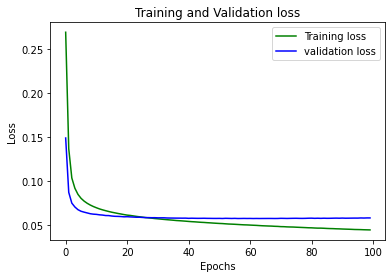

In [ ]:
trainer.train(num_epochs=100, lr=0.0001, weight_decay=None)

In [ ]:
output=trainer.gene_dataset.data

In [ ]:
adata_di=adata.copy()
output = np.array(output, dtype=float)
adata_di.X = output


----

#Quality check after scScope

In [ ]:
a1=adata.copy()
a2=adata_di.copy()
sc.pp.calculate_qc_metrics(a1, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(a2, percent_top=None, log1p=False, inplace=True)

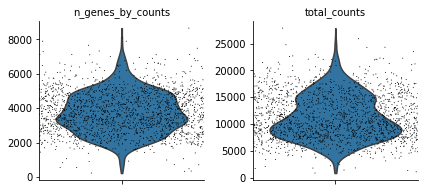

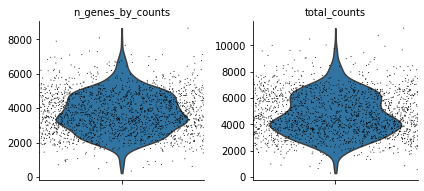

In [ ]:
sc.pl.violin(a1, ['n_genes_by_counts', 'total_counts'],jitter=0.7, multi_panel=True)
sc.pl.violin(a2, ['n_genes_by_counts', 'total_counts'], jitter=0.7, multi_panel=True)

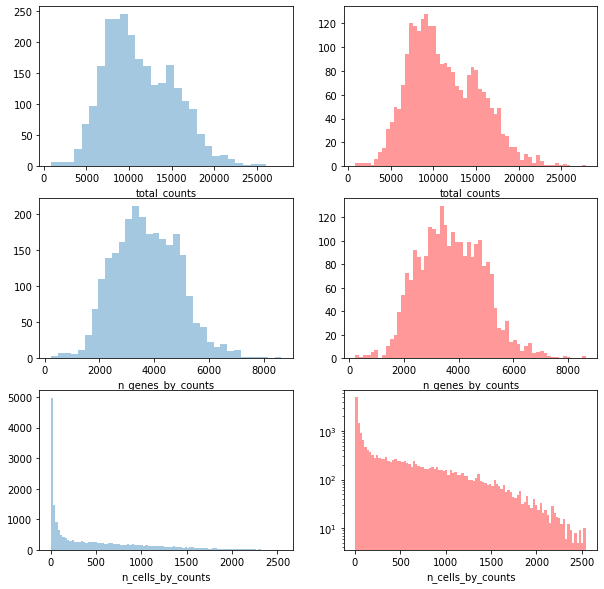

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
sns.distplot(a1.obs["total_counts"], kde=False, ax=axs[0,0])
sns.distplot(a1.obs["total_counts"], kde=False, bins=60, color= 'red', ax=axs[0,1])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, ax=axs[1,0])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, bins=60, color= 'red', ax=axs[1,1])
sns.distplot(a1.var["n_cells_by_counts"], kde=False,bins=100,  ax=axs[2,0])
plt.yscale('log') 
sns.distplot(a2.var["n_cells_by_counts"], kde=False, color= 'red',bins=100, ax=axs[2,1])
plt.yscale('log') 

#Principal Component analysis on datasets


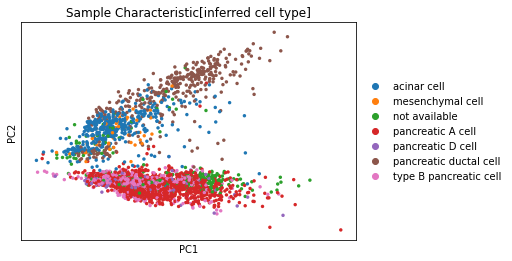

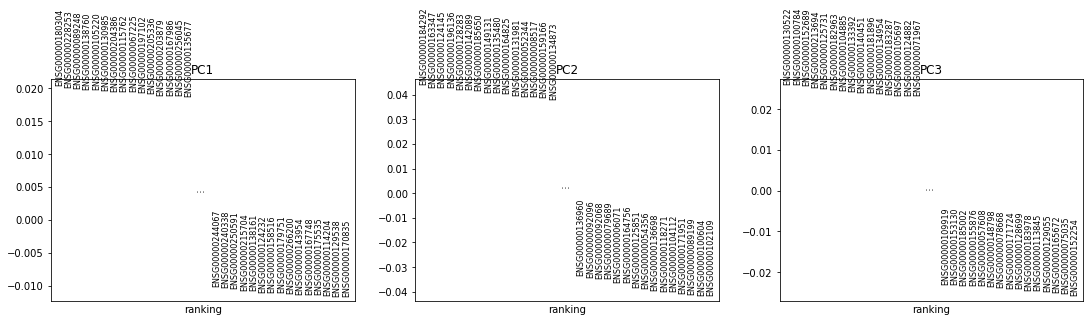

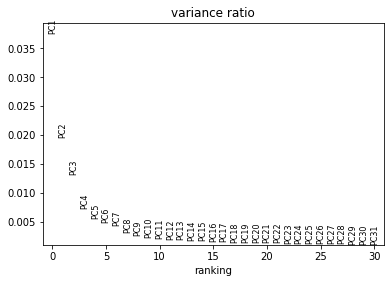

In [ ]:
sc.pp.log1p(adata)
sc.pp.scale(adata)
sc.pp.pca(adata) 
sc.pl.pca_overview(adata, color='Sample Characteristic[inferred cell type]')

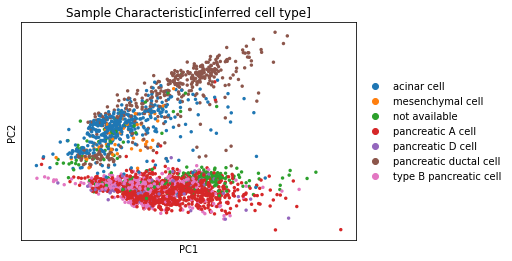

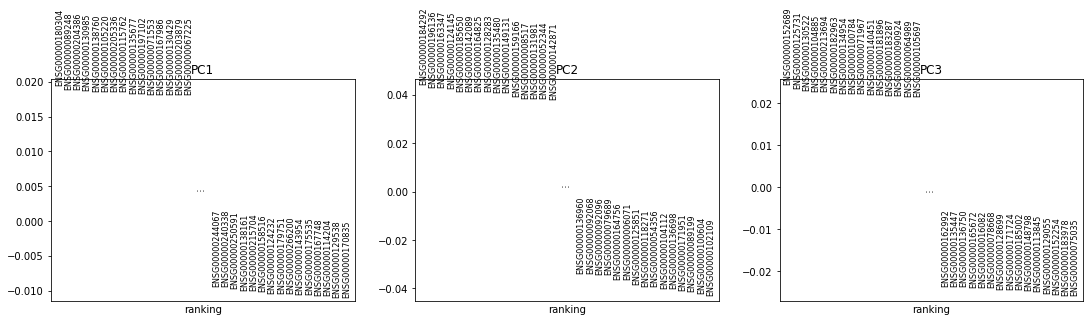

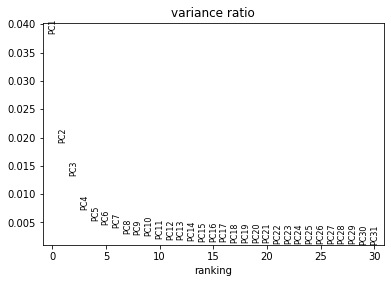

In [ ]:
sc.pp.log1p(adata_di)
sc.pp.scale(adata_di)
sc.pp.pca(adata_di) 
sc.pl.pca_overview(adata_di, color='Sample Characteristic[inferred cell type]')

#Dimensionality reduction

#1. tSNE 
visualing the data using tSNE before and after the model

In [ ]:
q1=adata.copy()
q2=adata_di.copy()

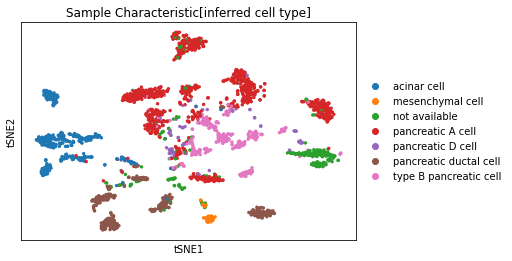

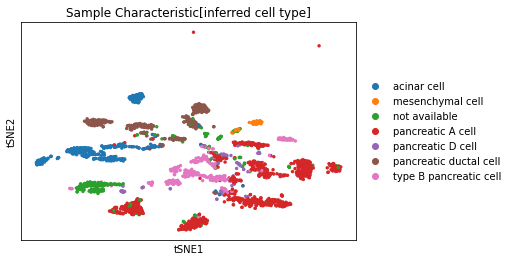

In [ ]:
sc.tl.tsne(q1, perplexity=30, learning_rate=1000, random_state=0)
sc.tl.tsne(q2, perplexity=30, learning_rate=1000, random_state=0)
sc.pl.tsne(q1, color='Sample Characteristic[inferred cell type]')
sc.pl.tsne(q2, color='Sample Characteristic[inferred cell type]')

#2. UMAP
visualing the data using UMAP before and after the model




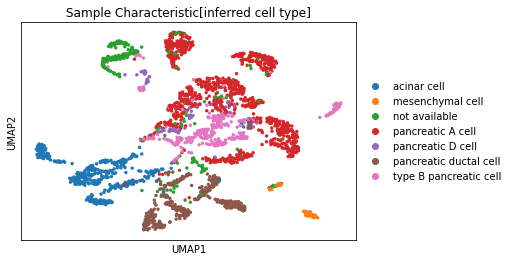

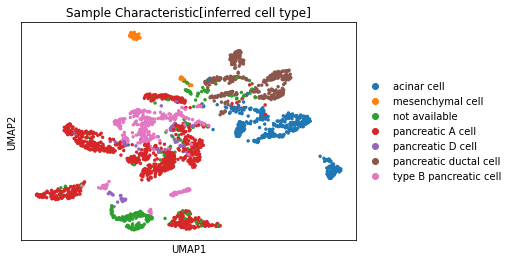

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pp.neighbors(adata_di)
sc.tl.umap(adata_di, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pl.umap(adata, color='Sample Characteristic[inferred cell type]')
sc.pl.umap(adata_di, color='Sample Characteristic[inferred cell type]')

#CLustering Analysis - using K-means


... storing 'kmeans' as categorical


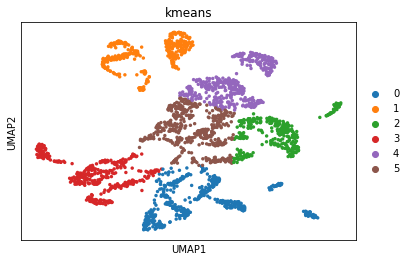

In [ ]:
umap_coordinates = adata.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata.obs['kmeans'] = kmeans.labels_ 
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') 

In [ ]:
rand_index = adjusted_rand_score(labels_true = adata.obs['Sample Characteristic[inferred cell type]'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.41


... storing 'kmeans' as categorical


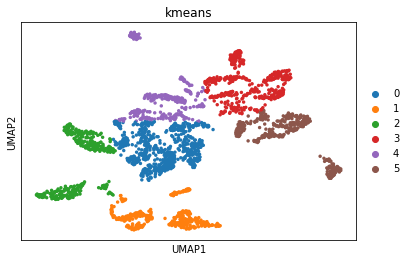

In [ ]:
umap_coordinates = adata_di.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata_di.obs['kmeans'] = kmeans.labels_ 
adata_di.obs['kmeans'] = adata_di.obs['kmeans'].astype(str)

sc.pl.umap(adata_di, color='kmeans') 

In [ ]:
rand_index = adjusted_rand_score(labels_true = adata_di.obs['Sample Characteristic[inferred cell type]'], labels_pred = adata_di.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.38


# Differential Analysis : Visualisations

# 1. TracksPlot


/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


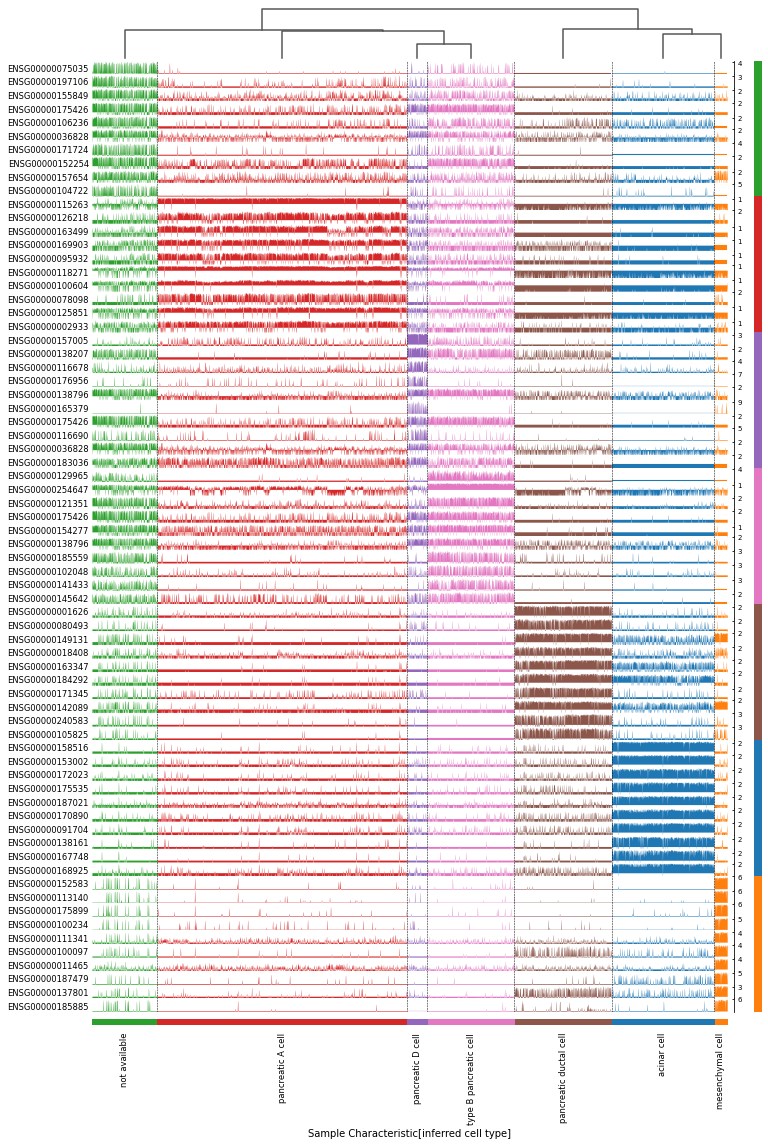

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='Sample Characteristic[inferred cell type]', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata, groupby='Sample Characteristic[inferred cell type]') # plot the result

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


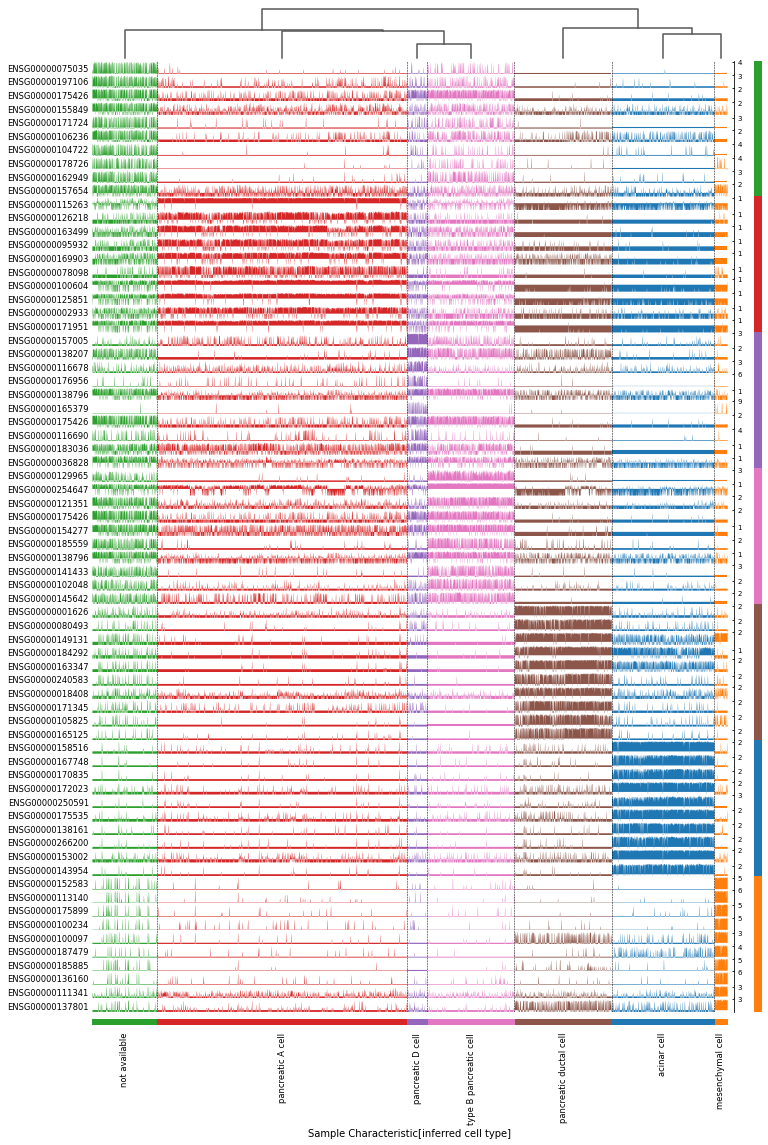

In [ ]:
sc.tl.rank_genes_groups(adata_di, groupby='Sample Characteristic[inferred cell type]', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata_di, groupby='Sample Characteristic[inferred cell type]') # plot the result

# 2. Heatmaps

These hetamps clearly show that the missing values are being imputed by Deep Impute without distrubing the cell cluster patterns

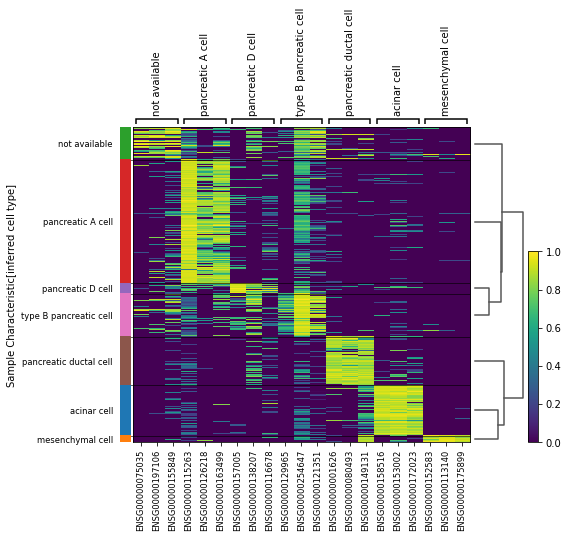

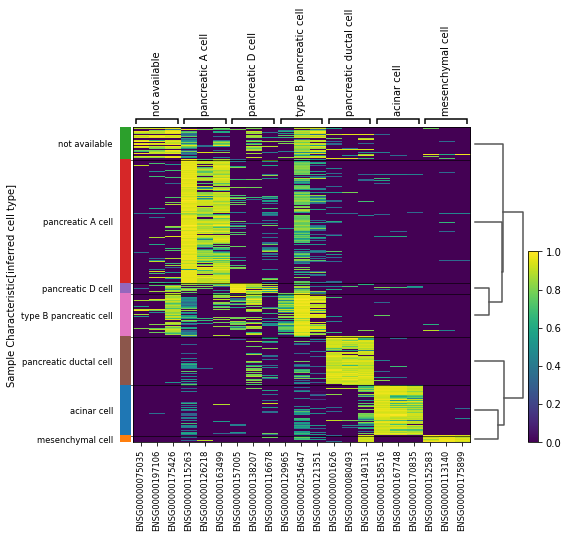

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=3, standard_scale='var')
sc.pl.rank_genes_groups_heatmap(adata_di, n_genes=3, standard_scale='var')

# Finding Marker genes

#Conclusions

Deep Impute effectively imputes the data having 0 gene expression level to improvise the clustering. This model can be proven as an effective way to improvise the clustering score